In [11]:
from matplotlib import pyplot as plt
import numpy as np

In [12]:
%matplotlib inline

# Generative Attempts

This notebook briefly describes a history of attempts at getting a generative neural network to learn how to best represent digits for a given phosphene map.

The original digit images look like this:

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAPcAAAD3CAYAAADBjMJTAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBo%0AdHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAESFJREFUeJzt3XusVeWZx/HvT25icbiIIHoMWLX1%0AlimtyNRoxmrFoLTFPxpj00xQiSbaUUxJLDrRaGKMRuMlamwTETBxQMfawZhMW6QagzFe8FYRQdrx%0AVJDL2ClSxxuXZ/7Y6yzX2nJgn3P22vuc9/w+CdnPu9Y6az+6z3Ped132uxQRmFl6Dmh3AmZWDRe3%0AWaJc3GaJcnGbJcrFbZYoF7dZovpU3JJmSlonaYOkBc1Kysz6Tr29zi1pCLAemAFsBF4GfhIRbzcv%0APTPrraF9+NnpwIaI+DOApGXAbCAvbkm+Q8aseh9GxKH1C/syLD8CeL/Q3pgtM7PW6tzbQp9QM0tU%0AX4p7E3Bkod2RLTOzfqAvxf0ycKykoyQNBy4EnmxOWmbWV70+oRYRuyT9K/A7YAjwUESsaVpmZtYn%0Avb4U1tDOfbbcrBVWR8S0+oU+oWaWKBe3WaJc3GaJcnGbJcrFbZYoF7dZolzcZolycZslysVtligX%0At1miXNxmiXJxmyXKxW2WKBe3WaJc3GaJcnGbJcrFbZYoF7dZolzcZolycZslysVtligXt1miXNxm%0AiXJxmyXKxW2WqP0Wt6SHJG2T9FZh2ThJKyS9m72OrTZNM+upRnruxcDMumULgJURcSywMmubWT+y%0A3+KOiOeA/61bPBtYksVLgPObnJeZ9VFvj7knRsTmLN4CTGxSPmbWJL1+hG+XiAg/zXNwGDlyZB6P%0AHz++tG706NF5PGLEiDzevXt3abvPPvssj3fs2FFat3Xr1m5/znqutz33VkmTALLXbc1LycyaobfF%0A/SQwJ4vnAMubk46ZNUsjl8KWAi8A35S0UdJc4FZghqR3gbOztpn1I4qo7nDZx+L9k6RS++ijj87j%0Ak046KY+PP/740naTJ0/O40MPPbS0rrtj7j179pS2Kx5zf/TRR6V1f/nLX/L4zTffzOPnnnuutF1n%0AZ2ceV/n7O4Csjohp9Qt9h5pZolzcZonq86Uw658OOuigUnvGjBl5PGvWrNK64vB70qRJeTxxYvn2%0AhVGjRjUzxa/YtWtXHm/ZsiWP165dW9pu6dKlefzEE0+U1tUP9Qcz99xmiXJxmyXKxW2WKB9zJ2rC%0AhAml9mWXXZbHZ599dmnd8OHDW5LT/gwd+uWvY0dHRx4ffvjhpe2mTp2ax8VLdwC33HJLHv/1r39t%0AdooDintus0S5uM0S5WF5oopDXIAxY8bkcaPD8M8//7zUXr16dR7X3zW2Zs2aPC5exqq/G654l9vM%0AmeU5QH74wx/uNccDDij3QcW746688spuc77xxhvz+IsvvmCwcc9tligXt1mi/MWRRB1zzDGl9qJF%0Ai/L4lFNOKa17//3383jx4sV5/PDDD3e7XTPUD9lPPvnkPL733nvzePr06aXt6ofpRcW73M4888w8%0AXrVqVa/zHAD8xRGzwcTFbZYoF7dZonzMnagpU6aU2vPnz8/j9evXl9YtXLgwjz/55JNK82pU8S60%0A4vE3wGmnnZbH9cftRcXLdcXjb/jqJBIDnI+5zQYTF7dZojwsT1T9XWjF4Wv93Vr9cR6y4h12F198%0AcWndrbd+OR/nuHHjut3Hzp0787g4Txw0/7Jem3lYbjaYuLjNEuXiNkuUvxWWqIH+LajibaRvvPFG%0Aad26devy+NRTT+12H8OGDcvjadPKh6SJHXPvlXtus0Q18jihIyU9I+ltSWskzcuWj5O0QtK72evY%0A6tM1s0Y1MizfBcyPiFclHQyslrQCuAhYGRG3SloALAB+UV2qNlh9+OGH+2w34rDDDmtWOgPGfnvu%0AiNgcEa9m8d+BtcARwGxgSbbZEuD8qpI0s57r0TG3pCnAt4EXgYkRsTlbtQWY2M2PmVkbNFzckkYB%0AvwaujogdxXVRu8Wp/93mZDaINXQpTNIwaoX9SER0PZxpq6RJEbFZ0iRgW1VJ2uBWP/PKkCFDeryP%0A4qW1waKRs+UCFgJrI+LOwqongTlZPAdY3vz0zKy3Gum5TwP+BfijpNezZdcBtwKPSZoLdAIXVJOi%0AmfXGfos7IlYB3X0j/vvNTcfsq8aPH7/PdiM++OCDZqUzYPgONbNEubjNEuUvjli/d+KJJ5baxx9/%0AfEM/V5ys4fnnn29qTgOBe26zRLm4zRLl4jZLlI+5rV8qzrt+zjnnlNYdfPDBDe3j6aefzuPt27c3%0AJa+BxD23WaJc3GaJ8rDc+o0DDzwwj88999w8Pu+88xrex8cff5zHd9555z62TJ97brNEubjNEuXi%0ANkuUj7mtbeonYSg+mvfqq6/O41GjRnW7j927d5fay5Yty+NVq1b1NcUBzT23WaJc3GaJ8rDc2uaE%0AE04ota+//vo8/sY3vtHQPl544YVS+5577snjzz77rA/ZDXzuuc0S5eI2S5SH5dZSkydPzuNbbrml%0AtO6MM85oaB/vvPNOHtffhbZ+/fo+ZJcW99xmiXJxmyXKxW2WKB9zW6UOP/zwUvuuu+7K41mzZjW0%0Aj87OzlL77rvvzuMVK1aU1n3xxRc9TTFZ7rnNEtXIs8IOlPSSpDckrZF0U7b8KEkvStog6VFJw6tP%0A18wa1ciw/HPgrIj4OHva5ypJ/wX8HLgrIpZJ+iUwF3igwlxtgJgwYUIe11+qKg7F6784UrR169Y8%0ALt51BvDII4/kcXFyBivbb88dNV3/B4dl/wI4C3g8W74EOL+SDM2sVxo65pY0JHvC5zZgBfAnYHtE%0AdD30eCNwRDUpmllvNFTcEbE7IqYCHcB04LhKszKzPuvRpbCI2C7pGeBUYIykoVnv3QFsqiJBGxjG%0AjRuXx7fddlsez549u7Td8OHdn3fdsWNHHt9///17jcGXuxrVyNnyQyWNyeKRwAxgLfAM8ONssznA%0A8qqSNLOea6TnngQskTSE2h+DxyLiKUlvA8sk3Qy8BiysME8z6yFFRHU7l6rbubXVIYccUmrfcMMN%0AeXzppZfm8ciRI7vdx6efflpq33fffXm8YMGCPN6zZ0+v8xwkVkfEtPqFvkPNLFEubrNE+Ysj1rDi%0AnWfFqYcBLrnkkjze11D8k08+yeMHH3ywtO66667LYw/F+849t1miXNxmiXJxmyXKx9zWrfHjx5fa%0AV1xxxV5j6P6RP8W7zgAWLVqUx9dcc01p3a5du7Dmcc9tligXt1miPCy3kuLw+vLLLy+tu+qqq/J4%0A9OjR3e7jo48+yuOFC8t3Jd9000157C+AVMs9t1miXNxmiXJxmyXKx9xWmkBh/vz5eTxv3rzSdmPH%0Aju12H8VLXsXbSu+4445ut7Nquec2S5SL2yxRHpYPQsOGDSu1i9/GKg7Fx4wZ0+0+6ucLX7x4cR4X%0A5xkvzj9ureWe2yxRLm6zRHlYPkgMGTIkj4vzk0H5zrN9DcWLc54tXbq0tO7222/P402bvpzluso5%0A+mzf3HObJcrFbZYoF7dZonzMnShJpXZxQsPiMTZ0f+fZzp07S+3ly798qMz1119fWudLXv2Pe26z%0ARDVc3NljfF+T9FTWPkrSi5I2SHpUUvdPeDOzluvJsHwetQcA/kPWvg24KyKWSfolMBd4oMn5WS+d%0AccYZpfZFF12Ux/Vzo3Wnfk6zjo6OPP7Vr37V++Ta4JVXXim1b7755jZl0joN9dySOoBZwINZW8BZ%0AwOPZJkuA86tI0Mx6p9Fh+d3ANUDXYyAOAbZnz+YG2Agc0eTczKwPGnk+9w+AbRGxugX5mFmTNHLM%0AfRrwI0nnAQdSO+a+BxgjaWjWe3cAm/axD2uxESNGlNpDh/b8qmf9M79OP/30PuXUTsXbbweL/fbc%0AEXFtRHRExBTgQuAPEfFT4Bngx9lmc4Dl3ezCzNqgL9e5fwH8XNIGasfgC/ezvZm1UI/GahHxLPBs%0AFv8ZmN78lMysGXyHmlmiXNxmifIXRxLV2dlZaj/88MN5PHHixFan03Zr1qxpdwot557bLFEubrNE%0AubjNEqUqJ7CT5NnxzKq3OiKm1S90z22WKBe3WaJc3GaJcnGbJcrFbZYoF7dZolzcZolycZslysVt%0AligXt1miXNxmiXJxmyXKxW2WKBe3WaJc3GaJcnGbJcrFbZYoF7dZohqa2ljSe8Dfgd3AroiYJmkc%0A8CgwBXgPuCAi/lZNmmbWUz3puc+MiKmFuZoWACsj4lhgZdY2s36iL8Py2cCSLF4CnN/3dMysWRot%0A7gB+L2m1pMuyZRMjYnMWbwEG32MszPqxRh8ndHpEbJI0AVgh6Z3iyogIT2Ns1r801HNHxKbsdRvw%0AG2qP7t0qaRJA9rqtqiTNrOf2W9ySvibp4K4YOAd4C3gSmJNtNgdYXlWSZtZzjQzLJwK/kdS1/b9H%0AxG8lvQw8Jmku0AlcUF2aZtZTfpyQ2cDnxwmZDSYubrNEubjNEuXiNkuUi9ssUS5us0S5uM0S5eI2%0AS5SL2yxRLm6zRLm4zRLl4jZLlIvbLFEubrNEubjNEuXiNkuUi9ssUS5us0S5uM0S5eI2S5SL2yxR%0ALm6zRLm4zRLl4jZLlIvbLFENFbekMZIel/SOpLWSTpU0TtIKSe9mr2OrTtbMGtdoz30P8NuIOA74%0AFrAWWACsjIhjgZVZ28z6if0+K0zSaOB14OtR2FjSOuB7EbE5e4TvsxHxzbqf9bPCzKrX62eFHQX8%0AD7BI0muSHswe5TsxIjZn22yh9jRQM+snGinuocB3gAci4tvA/1E3BM96dPfSZv1II8W9EdgYES9m%0A7cepFfvWbDhO9rqtmhTNrDf2W9wRsQV4X1LX8fT3gbeBJ4E52bI5wPJKMjSzXhna4HZXAo9IGg78%0AGbiY2h+GxyTNBTqBC6pJ0cx6Y79ny/u0c58tN2uFXp8tN7MByMVtligXt1miXNxmiXJxmyXKxW2W%0AqEavc/fWh9SugY/P4nZzHmXOo2yg5jF5bwsrvc5tZu3jYblZolzcZomqvLglzZS0TtIGSS2brUXS%0AQ5K2SXqrsKylU0NJOlLSM5LelrRG0rw25XGgpJckvZHlcVO2/ChJL2afzaPZdwcqJ2lINjfAU+3K%0AQ9J7kv4o6XVJr2TLWj51WJVTmFVa3JKGAPcD5wInAD+RdEKV71mwGJhZt6zVU0PtAuZHxAnAd4Gf%0AZf/9rc7jc+CsiPgWMBWYKem7wG3AXRFxDPA3YG7FeXSZR22qri7tyuPMiJhauC+7HVOHVTeFWURU%0A9g84FfhdoX0tcG2V71n3/lOAtwrtdcCkLJ4ErGtVLtl7LgdmtDMP4CDgVeCfqJ2RHbq3z6rC9+/I%0AfmHPAp4C1KY83gPG1y1r6ecCjAb+m+zEdrPzqHpYfgTwfqG9MVvWLm2bGkrSFODbwIvtyCMbCr9O%0AbVKNFcCfgO0RsSvbpFWfzd3ANcCerH1Im/II4PeSVku6LFvW6s+l0inMBu0Jtaj9WWzJdUBJo4Bf%0AA1dHxI525BERuyNiKrWeczpwXNXvWU/SD4BtEbG61e+9F6dHxHeoHTL+TNI/F1e26HOpdAqzqot7%0AE3Bkod2RLWuXlk8NJWkYtcJ+JCKeaFceXSJiO/AMteHvGEldNzK14rM5DfiRpPeAZdSG5ve0IQ8i%0AYlP2ug34DbU/eK3+XCqdwqzq4n4ZODY7GzocuJDa9Ezt0tKpoSQJWAisjYg725jHoZLGZPFIasf9%0Aa6kV+Y9blUdEXBsRHRExhdrvwh8i4qetzkPS1yQd3BUD5wBv0eLPJaqewqwFJy7OA9ZTO8b7t6rf%0Ar/C+S4HNwE5qfyHnUju+Wwm8CzwNjKs4h9OpDanepDb3++vZ/49W5/GPwGtZHm8BN2TLvw68BGwA%0A/gMY0cLP53vAU+3II3u/N7J/a7p+L1v9uWTvORV4Jfts/hMY26w8fPupWaIG7Qk1s9S5uM0S5eI2%0AS5SL2yxRLm6zRLm4zRLl4jZLlIvbLFH/D9zDSNtMI0ZNAAAAAElFTkSuQmCC">

The aim is to develop a network which can process this image and output a **vector** (*not* an image), which when subsequently fed to a specified distorted renderer, will produce an image that a human can infer the original digit from. The renderer does not change, so we can (hopefully) train a network to best work with the renderer it gets.

## May 30th: Naive GAN

| Property | Value |
|-----------------|---|
| Git Commit Hash | None (run on colab)  |
| Grid | Polar Regular Unique |
| Vector size | 12 $\times$ 12 = 144 |

``` ditaa
              +--------------------------------------------+--------------------------+
              |                                            |                          |
              v                                            v                          |
            Encoder               Renderer              Decoder                       |
100-vector ---------> 144-vector ----------> 2D Image  --------> Class (binary) -+    |
                                                                                  - Loss
                                             MNIST Im. --------> Class (binary) -+
                  
```

First attempt was just a completely naive GAN that attempted to transform a random seed (100-vector of random floats) into a 144-vector of floats that, when fed to the renderer, would best look like a digit. As this was dissociated from the actual digit identity, this was purely a feasibility test.

It looked like the below after 5 epochs (total 202 seconds, after which I stopped it).

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAPwAAAD4CAYAAADIOotxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBo%0AdHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJztnWlwHOWd/799Ts90z33qsCRbsvCF%0AsRcw2SQEbEMtFWBZCE4g3lQFfLABzG5t7W5V3qV2X+1BXvxJ8nLfrA9gk6pUUhuOhIAhCWBky6TI%0AJnEWbMuWNJpDmnv6mu7/C/E8zOjwKVnTmv5UTSXILXV/53m+/dy/H2PbNlxcXDoDdqUfwMXF5cbh%0AGt7FpYNwDe/i0kG4hndx6SBcw7u4dBCu4V1cOgjX8C4uHYRreBeXDsI1vItLB8Ev5x9nGMbR2/hs%0A22au9NpO0erqdAaL6XRbeBeXDsI1vItLB+Ea3sWlg3AN7+LSQbiGd3HpIFzDu7h0EK7hXVw6iGVd%0Ah3dxWS5SqRQYhoFpmpiZmYFpmiv9SI7AUYYXBAEejweCIMCyLIiiiJ07d0KWZZw7dw5vvvlmy/UM%0AwyAUCqFer0NV1RV66muD53l4PB7wPE+17tq1C4qiLKgVAPx+P8rl8go87bXD8zxEUQTP87Btu0Xn%0A2NgY3njjjZbrY7EYenp6kEqlUK/XUSqVwDAMZmZmYBjGCqm4PAzDQBRFMAxDy3P37t0IBAIYGxvD%0A8ePHb8hzOMbwLMtCFEXIsgyv1wsAkGUZ27ZtQzgchqIoLSZgGAbRaJQafmJiAk6J30e0+nw+qtXn%0A811SazgcRiAQAMuyKBaLK/XoVwXDMBAEYZ7OrVu3IhKJQFGUFsP7fD4EAgH4/X54PB7oug4AaDQa%0AaDQaK6LhShFFEV6vF5IkAQAkScK2bdsQjUahKMo8wyuKAq/Xi2w2u6TP4RjDA7MFq+s6WJalb0yP%0AxwNFUaAoCnieh2ma4HkeiUQCkUgEwWAQuVwOPp8P1Wp1pSVcEbZto9FowDAMqpX0bvx+PwKBAARB%0AgGEYEAQB8XicvghM03SM4QHAsqwWnaRM/X4/FEWBKIrQdR2iKCIejyMWiyEUCsG2bRiGAVVVUa/X%0AYVnWSktZFIZhWsoUADweD7xeL4LBIEKhUEvdjcViCAQCkCQJpVIJmqYt2bM4xvCWZUFVVaiqCoaZ%0A3Sbs9XoxMjKCRCKBdDoNURTh9/vR3d2NdevWIRQKgeM4VKtVeL1eRxle0zRa0AzDwOv14uTJky1a%0AFUWhWoPBIFiWRaVSQbFYdETXfiGd5XIZp06dQiKRwNTUFARBgCzL6O7uxuDgIMLhMERRxB//+Edk%0AMhlMTU2hVqutsJJLY9s2dF2nPRKGYVCr1XD69GlMTExgamqqpe6uXbsWfr8fAFCr1TA2NkZ/93px%0AjOGbsW0bDMNA13WMjo5ClmVUq1U0Gg1wHAdBEMDzPB0vmabpmO78YszVapomvF4veJ4Hx3FUa7t3%0AbS+Hrus4ffr0gjpZloVlWdB1HZVKBZVKxTEv8WZI76RZJ6m7PM/TMrVtGxzHtQxfrhdHGl4URUiS%0ABE3TcP78eXAch0ajAYZhEIvFEIvF0Gg0oGkaTNNEpVJZ0m7RjYSM/VRVXVSrZVnQNA2GYaBWq7X1%0A5NViXEpnNBptKVPDMFAoFFAulx03O3+5uhuPx+lLzTAMaJq2pI2VIw3v9/vR1dWFjz76iP6M53mk%0AUins3bsXPT09OHLkCMrlMsrlMiYnJx1r+EAggO7ubvz2t7+lP2NZFl1dXXj88cfR3d2No0ePtmh1%0AouGDwSC6u7vx4Ycftvy8p6cHe/fuRVdXF44ePYpKpYJyuYwLFy44UmcgEEAqlWqpu4IgIJlMYu/e%0AvS3lWa1WkclklnTI4kjD67qOWq2GSCSCcrkM27YhCAJs26Ytej6fh23bqFarbT2hczk0TUOlUkEo%0AFKLjctLdMwwDlUoFMzMzsCwLtVrNsV16VVVRqVQQiURQKpVoy010VqtVTE9PO75MNU1DrVZDOBxG%0AuVwGwzDweDwt5dlcd0nrv1StvCMNL4oiuru7EQgEkMvlkMlkYBgGdF3HxYsXkcvlMD4+Tif3FEWh%0AlcZpY3lRFJFIJOi4rlgswjRNGIaB8fFx5PN5qtW2bfj9fmia5rh9B6SV8/v9yOVySKfTVOdCZUp0%0A1uv1FX7yq0MURXR1dcHn8yGXyyGfz0PTNOi6jgsXLiCbzWJ8fBwsO7sJ1u/3wzRN1Ov1JemlMstp%0AgOWKGvLggw9i48aN2LdvH3bv3o10Oo1gMIh8Pk+vIbPYqVQKt9xyC0zTxPj4OH7zm99c8X3aIeLN%0A7t27sWHDBuzfvx8PPvgg0uk0FEVBoVCg1wiCAEVRkEgksGXLFvoyOHny5BXfZ6Ujwdx///3YuHEj%0AnnzySdx7773I5XJIJBK4cOECvYaUaSKRwC233AJd1zE+Po4TJ05c8X1WWudf/MVfYMOGDXjiiSdw%0A//33I5fLIZlMYmxsjF5DZuxTqRS2b9+ORqOByclJvPXWW1d8n8V0OrKFz2azuPvuu/H222+jVCqh%0A0WjQtWeyaSUejyMej9P1eNLVdxqqqmJwcBAnT55EuVxGo9GYt+QWDocRiUSQTCYRiURgGIYjluWa%0AqdVqWLt2LUZGRlAul2EYBqamplquSSQSiMVijtZZrVbR3d2Nd99997I6U6kUIpEIGo0GarUaXaW4%0AHhx5eIbjOPzN3/wNOI7DvffeC1EU6ZhPkiT09/djzZo1GBoaQjKZRKFQwMzMjOMqBzCr9bnnnoMo%0AinjggQfg8XjmjdMTiQR6enoQCoVQKBToDLaTYFkWTz/9NHRdx/333w9BEOYtRfX29mJoaAiJRIKW%0AqdNe4izL4u/+7u/A8zzVOber3tPTg8HBQcTjcRQKBUxPT6NUKi3NvIVt28v2AWAvx4fjOPvdd9+1%0Abdu2PR6PzbKs/fnPf972eDx2MBi0b7rpJnt4eNg+dOiQvWXLFjsajdrJZNL2eDxXdZ920MqyrP3T%0An/7Utm3bliSJahVFkV4zNDRkf+tb37I3b95sh0IhOxQK2RzHLYvW5dT54x//mJYpwzD2jh075ukk%0AZRoOh+1oNOpInf/5n/9p1+t1qnPz5s22IAj0muHhYfu5556zt27dasdiMTsej9uKoiyJTke28JZl%0A4Vvf+hbee+892LaNQCCAnp4ebNmyBalUChMTE4jFYhgeHkYwGES9XsfQ0JDj1myBWa3f/va38frr%0Ar8OyLCiKAlmWsWnTJgwODoJlWarV7/ejUqlAlmXHzdbbto3vfOc7ePvtt+nko9/vx6ZNm7Bu3ToA%0Asz0ZUqa1Wg1r1qxxnE7LsvDd736X1l1RFDE+Po7BwUEMDAwAAOLxONavX49AIEAPBy3V0pwjx/Cy%0ALONnP/sZZFnGF77wBQDAL37xCxiGgUgkgmg0ir6+PoRCISQSCdRqNbz77ruOXMqRZRmvvPJKi9YT%0AJ06g0WggFAqht7cXfX19iEQiSKVSdHLSaciyjHfeeQeKouBLX/oSbNvGyMgIGo0GIpEIBgYG0N/f%0Aj0gkgkQiAU3TcPr06ZV+7KtGURT86le/gizLuPPOO2FZFt59912MjY0hHA5jzZo16OvrQzQaRTKZ%0AhK7ryGQyS3Z/R87SA7NjdZZl8fzzz+OFF16AIAjo7+/Hnj17EIvFcPjwYei6jmw2e1Wzm820wyw9%0A8JnWf//3f8cLL7wAURSxZs0aPPjgg4hGo/jRj34E0zSRy+WWXeuNKtPvfe97EAQBfX19+MpXvoJY%0ALIZjx47RMl3oePCV0E46/+M//oPq7O7uxgMPPIBIJIKf/OQnsCwLuVxu3vHgK2UxnY41PGFkZAS3%0A3norAOCxxx6jp+lKpRIURUE+n8fbb799TX+7XQxPeO+993DHHXcAAPbs2UN3mlWrVfj9/hui9Ubo%0AHB0dxbZt2wAAX/va11p0yrKM6enpaz4/3k4633//fezYsQMA8NWvfpVO3mmaRsvz+PHj19QzXVXL%0Acs3s27cPhw4douPZqakp6LpONys4bbb6Uhw8eBBPP/00BgcHwXEcLl68CMMw0Gg0oKrqqtH6xBNP%0A0DIlOkmZBgKBlj0ITubgwYN47rnnqE6ygYycIiQ78cgmnKYJxWvG8S28JElIJBKQJAk7d+6Eqqo4%0AevTokuyzbrcW3uPxIJlMQpIk3HXXXVBVFS+++OIN1XqjypTo3LlzJzRNw+HDh1e1TlKex44do9tp%0AGYYBx3HgOA4sy9J1eFVVLzsBvWq79J/eZ8H9xterrd0M/+l9VlTrSupcirrqBJ0kGAgJfEKOzXIc%0ABwB0o9mluvqrtksPgL4JyT5rlmVpBJGlPl640pAuHunmEa0kmooTlx4XYqEy5TiOnplYLczVyXEc%0ARFGEbdvU0KSVFwQBwOzJ0HA4jEajQY9Gm6Z5RUuUjje8KIoYHh7GwYMHIcsyXnrpJWQyGfA8j1Kp%0AhEwms2rGfIIgYP369Thw4ADVSqKllEolzMzMtJwncCqLlSnHcSgUCpiamnLcDruF4Hkew8PDeOqp%0Ap6AoCl588UVks1l4PB5Uq1WUSiUUCgX6gm8eyzcHBLmamH6ONzzP8yiXy3jllVcQCoWgaRpkWYZp%0AmvS01WqB4ziUSiW8+uqrCAaDUFWVbrIhseFWAwuVqc/ng67rLXHhnA7DMCgUCvN0kihNZALPsqyW%0AaEb2p/HxyM+upmfneMNbloV6vY6zZ88iGo0CmP0iq9UqDSKwWiBaP/74Y0QiEQCfxUerVCptH9vt%0ASlmoTFmWpasuTg1mshCqquKTTz6h5Ul0VqvVlvgGpMsPgBq92fBXiiMNzzAMeJ6ns5yhUAjxeJxW%0ADnKKajW1BBzHwefzQZZlKIoCv99Pu3jlcpkuWzmV5jJNJBIIh8O0TBmGoWXqZI1zISGsVFWFrusQ%0ABAEMw9BQXiQaL8dxME2TTu6RHoBlWVc9P+VIw7MsC0mSEIlEsGnTJnqcMBqN0kghU1NT844dOhUS%0AyDAUCiEUCiEcDiMcDtNJnGKxCFEUV/gpr4/mMt28eTMt01gsBtu2UavVaJk6KQz35ahWqxAEAZIk%0AwefztSRbIea3bZu+3En3/lonoh1peNLapVIp3H777eju7kY0GkUgEKBbTE+ePEkN4WRI6+71ehGL%0AxeD3+xEMBuH3+6nJyQSOk1moTCORCEKhEBqNBvL5PE6dOuX4F9tCFAoF2LZNQ403d9/JeH2pDgk5%0A0vA8z0NRFPT19eHuu+9GT08PneyYmZlBqVRCNptdFS2B/WlIblEUEQwG4fV6Yds2CoUCLMtCtVrF%0AmTNnkMvlVvpRrwtSpmvWrMHdd9+N7u5uWqbT09MoFApIp9OYmZlZ6UddForFIorFIsbGxhAIBFCv%0A15dlSOpIwwOfbVho7uqQgI/T09PI5/OrZsKOjNk0TYNlWWBZFqZpQlVVFAoFx5sdmL+pxv40IKmm%0AafQFns1mV8324UtRKpWW7W870vDEAPV6Hblcjoa1IuO88fFxFItFx52VXgxd11Gv1zEzM0M32ZAs%0APKulxSPLiiQ0MzkrTuZjxsbGVsWLbaVx7NZan8+HaDSKzZs3w+PxAJiNi1Yul5FOp3Hu3Lnrvkc7%0Abq1dLtphy6koiohEIrjpppvobrNyuYxisYhMJoPp6enrvkc76LwRrMq99GRcC8zuL65Wq0u6Rusa%0Afj43QieZp9B1fcmDlrSTzuVkVRp+uXENPx9XpzNYTKez13JcXFyuCtfwLi4dhGt4F5cOwjW8i0sH%0A4RrexaWDWNZZehcXl/bCbeFdXDoI1/AuLh2Ea3gXlw7CNbyLSwfhGt7FpYNwDe/i0kG4hndx6SBc%0Aw7u4dBCu4V1cOohlDXG1Ws8UL0SnaHV1OgP3PLyLi4treBeXTsI1vItLB+Ea3sWlg3AN7+LSQTgy%0AEYXLpWEYBuFwGB6PB9VqdVkzmbg4C9fwq4xQKIRUKoVgMAiGYVAoFMAwzKrIs+dy/biGX2UMDw8j%0AGo1CURRomgaO41Cr1VzDOxSSVck0zSVJneYYw5MMql6vl6YMFkURu3btgizLGBsbw//8z//M+x2P%0AxwNVVVfika8LnuchSRJ4nodlWRAEATt37oQsyzh37hyOHz/ecn04HMb69euxY8cOCIIAy7KQyWRQ%0ArVbbOsVycz50y7IgimKLzjfffHPe7/h8PtRqtRV42muH5/l5Ou+66y4oioKxsbF5Ov1+P5LJJGKx%0AGGq1GkqlEiYnJ687s5JjDM+yLARBgNfrhSzLAABZlrF161aEw2H4fD787Gc/o1lIeZ6H3++HLMu4%0AePHiSj76VcOyLDweD2RZplq9Xi/+7M/+DKFQCIqitBie5GQLh8MQBAEAoGkaarUaqtUq6vX6iui4%0AHCQJqCzL8Hq9AGbLdNu2bQiFQpBlucUIDMMgFAohEAggl8s5Jjsw0enz+eDz+QDMluctt9yCUCgE%0An8/XopOkUAuFQvB6vTAMAyzLzsuwey04xvC2baPRaEDTNLAsC4ZhwPM8eJ6Hz+eDLMu0Nfd4PIjF%0AYjSfeqlUctTEFdFqGAZUVaVaPR4P/H4/AoEAeJ6HaZrgeR5dXV2Ix+MIBoPQdR21Wg2VSgVTU1PI%0A5XJtnWG20WhA13VapqIoUp1+v79FZyKRoC88kmnWCdi2TbPjapoGhmEgCAJEUYSiKAgEAhAEAYZh%0AQBRFJJNJRKNRhMNhWJaFRqMB0zSh6/p1P4tjDG9ZFur1Ok2RzDAMvF4v3n//fSSTSaTTaXAch0gk%0Agu7ubqxduxaBQIBOWNXrdRiGsdIyrgjbtmk6aABU68jICBKJBNLpNERRhN/vR3d3N9avX49oNAqv%0A14tz584hm80il8vh/PnzME1zhdUsjmVZVCfDzG79vpTOdevWIRgMgmVZuvpQqVRWWMXlWaw8T506%0AhXg8jqmpKQiCAEVRWnTyPI8//OEPKBQKS5Yq2zGGJzR3azRNw+joKBRFQaVSgWma8Hq9tOVnWRaW%0AZYFlWfA87xjDL4Su6xgdHYUsy6hWq2g0GuA4DoIggGEYap7p6Wnkcjlks9m2NvtcbNsGwzCX1Mnz%0APNXaaDToS8KJ6LqODz/8EF6vF/V6neok9da2bRiGgVqthlqttmTDMscZHpidufR6vVBVFefPnwfH%0AcWg0GmBZFrFYDPF4nHYVdV2nX6gTWUwrwzCIxWKIxWK099NoNGgX3klDGAB0QvZSOueWqRNf4M06%0Ax8bGaKPEMAwikQgikQgsy4KmaTAMA8ViEdVqdUnG74BDd9oFg0EMDAxAVVXU63XaukejUezduxeP%0AP/44qtUqMpkMLly4gHQ6vSTjn5UgGAxi3bp1LVoNw0AsFsM3vvEN7N27l47Xz549i/Pnz2N6enql%0AH/uqIWWqaRrVqes6YrHYgmU6OTnpyNWXQCCANWvWUJ3VahWapiESieCrX/0q9uzZg0qlglwuh4sX%0AL2JiYmJJ5yoc2cKrqopKpYJoNIpSqQSGYSBJEmzbhmmaqFaryOfzsG0b1WoVlmWt9CNfM6qqolQq%0AUa3AbCtBunyVSqVFq5O68c2QMg2FQiiXy3RiazGdTu2xEaNHIhGUy2VYlgWe51t0Tk9PL5tORxpe%0AFEV0d3cjGAwim81iamqKzs5fvHgRuVwO4+PjdIzn9/vpF+00iFayFJVOp6FpGnRdx4ULFxbUSmbq%0AnYQoikilUuB5HhzHoVgswjAMqjObza4anV1dXfD7/cjlcpiamoJpmjAMAxMTE5iensbExAS9nuhc%0Aqrq7rLnllitqyMMPP4wNGzbg4MGDuPPOO5HJZBCNRjE5OUmvIUseqVQKN998M0zTxMWLF/H+++9f%0A8X3aIeLNww8/jE2bNmH//v1Uazwex/j4OL2GaE0kErjlllug6zomJiaWRety6bz//vuxceNG7N+/%0AH/fccw8mJyehKErLDsHVoPO+++7Dhg0bsG/fPtx3333IZrPzypPM2CeTSdx8880wDAMXL17EyMjI%0AFd9nMZ2ObOELhQLWrl2L999/H+VyGaZpzlu2SCQSiMViSKVSiEQiME3TcRNZAFAul7F27VqcOHGC%0Aas1msy3XkHXbZDKJSCRCu4ZOolwuo7+/n+q0LGueBlKmRKdpmo7UmUgk8NZbb9G5p7nlGYvFWspT%0A13WUy+Ulub8jJ+04jsOBAwcgyzK+/OUv000LzfT29mL9+vVIJBIoFAqYmZlZsi/tRsKyLPbt2weG%0AYfDII49AFMV5E5Br1qzB+vXrkUwmUSgUUCgUHKeVYRg8++yzYBgGf/mXfwmPxzNv/Nrb24uhoSFH%0AlynDMHj66acBAA888MCC5dnV1YWBgQFEo1Fankv2YrNte9k+AOzl+HAcZ//hD3+wbdu2PR6PzTCM%0AvWHDBlsQBHrN0NCQfejQIXvLli12OBy2g8GgzfP8Vd2nHbSyLGu/9tprtm3btiRJNsuy9he+8AXb%0A4/EsqDUUCtl+v3/ZtN4onQzD2LfddpstimKLzmeffZaWaSwWc6TOF198saU877jjjkV1hkIhOxwO%0AL5lOR7bwlmXhm9/8Jk6ePAkAkCQJ+Xwea9euxZo1awDMdv+Gh4cRDAZRLBZhmqYjZ7Bt28Y//uM/%0A4sMPP4RlWQiFQhgeHsbNN9+MgYEBAK1aSevuNK22beOf/umf8M4778CyLHqGYOPGjRgcHATwmc5A%0AIIBarYa+vj7H6bQsC9/5znfwy1/+EoZhwOv1IhwOY9OmTS3ledNNNyEYDKJarSIYDC6ZTkeO4WVZ%0AxvHjxyGKIu655x5YloW33noLtVoNkUgEAwMD6O/vRyQSQSKRgGVZjtl3PRdFUXDq1ClwHIcvfelL%0AAICf/OQn0HUd4XB4nlanIssy3n77bciyjDvvvBOWZWFkZAS2bbeUaTgcRjKZhKZpOHXq1Eo/9lUj%0AyzLeeOMNyLKMtWvXAgB+/etfw7ZthMNh9Pf3o6+vD6FQCIlEAoZh4Ny5c0t2f0fO0gOzrTrLsvju%0Ad7+LF154AYIgoK+vD3v27EEsFsORI0dgGAYymcyCRyyvhHaYpQc+0/r888/je9/73oJadV1HNptd%0Adq03Wmd/fz8effRRxONxHD58eFXo9Hg8YFkW//Zv/4bvf//7EEURPT09eOSRRxCLxfDDH/4QhmEs%0Ai05HtvAA6C6rO+64A0899RQA4LHHHsOPf/xjAEClUoHf71+x51tKiNYdO3bgo48+AjBfq6IoS7b9%0AcqUgOm+//fZVrZOcad+4cSN+//vfAwAeffRR/PSnPwXDMKjX65BleVk2jDnW8IQnnngCzz33HAYH%0AB8GyLCYnJ6HrOt2PTHbiOb2SAMC+fftw6NCheVpN04Sqqqsmqs3+/ftx6NAhDA0NgWVZutloten8%0A+7//ezz99NNYt24dWJbF1NQUfRkEAoFl0enYLj1BkiQkk0lIkoS77roLmqbh6NGjME0TDMPQDzlv%0ADYCeL74c7dKlJzRrvfPOO6GqKl566aUlOUTSDl1dQrPOXbt2QVVVHD58eNXp9Hg883SSoej1sphO%0Axxv+0/vMa8VZlqX/xnEcWJYFx3H0OtJaXIp2M/yn91mwx3K95dhORvj0Ph2rcyk8uerG8M0QU5MW%0AnIQUIpFGLMsCx3HU+ADo9Y1Gg36cwEJaBUGgEVGcouNyLKaTHJF12nLcYpDeJ6mXpGEi5bnUDbLj%0ADe/xeLB+/XocOHAAiqLgxRdfRDabhSiKqFarKBaLLcdFSQUiYaPIuWtN09r+VJ0oihgeHsbBgwep%0A1kwmA1EUUSwWkcvlkM/nV/oxrxtBEObpJGVaKpWQz+fnbUd1IqIoYmhoCE8++SQURcF///d/Y2pq%0Aih4emp6eXvLt4I43vCAIqFQqePXVVxEKhaBpGnw+H42KYhgGDTBA/pe0/I1Gg/YA2t3swGxgzkql%0AgldeeYVqlWWZ9lCceuZ/LizLolQqLVim5GTZaoDjOFQqFfz85z9HMBik5WkYBh12LjWON7xpmqjV%0Aajh79ixCoRCA2S+SBFGo1Wq0m9u8xZBUHqeYHZh9/nq9jrNnzyIajQKY7alUKhWUy2XHbi6aC8Mw%0AUFUVZ8+eRSQSoT+rVCqoVCqrRqf9aay78+fP07pLtC9XtGHHGp7EqZNlGYqiQFEUhMNhcBxHgweQ%0AqK+GYdBwSXP2S7c9ZOhBZq5DoRDi8ThisRgA0JNxpCfjVBbTSV5sJEqt01v4Zp2JRALhcBjRaJSG%0AtiIn40grv9Q40vDNX1osFkMoFEIkEkE8Hqdx2cvlMvL5PJ0McaoZOI6DJEmIRqPYvHkzPSIai8Xo%0Aiy2bzTp+TMuybIvOeDxODW/bNmq1GnK5HHK5nKP3VZDyjEQiVCepw6ZpolgsYmJigtbjpcaRhm9u%0A3VOpFEKhEILBIKLRKA2L5PF4wHHcSj/qdcNxHNV5xx13oKurC9FolFaQXC6H0dFRGr3WqUYg+QVS%0AqRR27NhBdQaDQTQaDeTzeZw+fRqiKIJlWceuRnAcR3Xefvvt6OrqQiQSgaIoqNfrmJycxMjICHh+%0AeazpSMOThAWBQICGfyIpfEi88rNnzyKbzV53ap6VRhAEBAIBDAwM4J577kFPTw9kWYZt25iZmYGq%0AqigUCqjVao41O/BZpqD+/n7s2rULPT098Pl8VCfpyZRKJceaHWjVuXv3bnR3d9OJ12w2S+eelitA%0ApyMNP3ccTibgSGRXEpd9tUzukLXZ5nj7ZH6iVCqhUCg4Ml7fQszdFanrOqrVKmZmZqjxnQzRR8qT%0A7A0xDIPWYTLvtBw41vBkGapSqdDlNk3TaCjj1bLfGphdidA0DTMzM5AkCZIkQVVVZDIZZDIZ1Go1%0Axy/JkZUTVVWRz+fB8zxEUYSmaZicnMTExATNIORkmnXOzMzQ/SKapiGbzWJ6ehqqqi7bxiJHb60l%0A3V2GYejy3FJW/HbYWktSLSWTSdx6662QZRk8z0PTNJTLZUxNTeG99967biOs9JZTlmUhyzLi8Ti2%0Abt1Kk0uqqopyuYx0Ok1P0F0PK61TEAT4/X4kEgls374diqKA47iWxurEiRPXHY13Ve+lXy7awfAk%0Ak6yiKOjq6qKpn3Vdp2ZojtZ7ray0EYBZrT6fD5FIhKZbqtVqVOdSsNI6mzMDp1KplvIkPdbmMNXX%0Aimv4a6AdDA+A5laTZZkagcQGeDRIAAAgAElEQVSmX6pJyZU2wpx7LNsEZDvobC5PotUwDJpddimW%0AkF3DXwPtYvgbQTsY4UbQ6TodGcTSxcXl2nAN7+LSQbiGd3HpIFzDu7h0EMs6aefi4tJeuC28i0sH%0A4RrexaWDcA3v4tJBuIZ3cekgXMO7uHQQruFdXDoI1/AuLh2Ea3gXlw5iWSPerNYTRwvRKVpdnc7A%0APS3n4uLiGt7FpZNwDe/i0kG4hndx6SBcw7u4dBCu4V1cOgjX8C4uHYQjM89cLX6/H5IkgWEYFAoF%0Ax2dpuRQejweBQAAejweapqFUKjk+v57L0rHqDS/LMvr6+sDzPBqNBliWxfT09Ko1/eDgIHw+H1iW%0ARaVSAc/zSKfTjk406bJ0OMbwJGOsJEkQRRG2bUMURezatQuKouD8+fN45ZVX6PUsyyKVSqGvrw99%0AfX3QdR3lcplm+Jienl5BNZeH53lIkgSe52FZFkRRxN133w1ZlnH+/Hm89dZbLdfHYjEMDAzgpptu%0AornLJicnoes6fD5f2yZhJJlYSIINQRBomY6NjeH48eMt1/M8j0QiAZ/PRxNpOuHlTXLlcRxH6+7u%0A3bsRCAQwNjaGn//85y3Xk57aUvfQHGN4lmUhCAK8Xi/N2OHz+bB161aEw2F4vd4Ww8uyDL/fD0VR%0AIAgCdF2nCSiXKzPnUtGcjojkWJNlGdu3b0c4HIbf728xvNfrRSgUQjAYhCiKNBkhebm1q17yEvf5%0AfHTIJUkSbrnlFpozvdnwLMsiEokgEonA4/EsSz7B5YBhGPoClyQJAODz+XDzzTcjGo1CluUWwwuC%0AgFAohFAoBI7jkE6nl+xZHGP45oyxLMvSlLskZY+iKHTcKkkS4vE4otEo/H4/TNOkebfL5TIqlcpK%0Ay7kszVqJMTweD/x+P/x+P3ieh2maEAQByWQSsVgMgUCAai2XyygUCiiVSm1tCNu26cupuRfn9/sR%0ADAapTtKyx2IxRKNR1Ot1cBxH00q3O5ZlwTAMWp6mabaUJ6m7Ho8H8XgckUiE1l1BEJbspe0Yw1uW%0AhXq9DlVVAcy+Nb1eL06cOIFEIoGpqSnwPA9ZltHd3Y2hoSGEw2F4PB786U9/wuTkJKamppDP51dY%0AyeUhXfK5Wk+ePIlEIoF0Ok2zyhKtkUgEkiTh448/xtTUFDKZzJIkmVxOSI480mVlGAaVSgWjo6O0%0ATEVRhKIoSKVSGBwcRCgUgiAI+N///V+oqnrdWVZvBLZt095WuVwGwzCoVqsYHR3F+Ph4S93t6urC%0AunXrEAwGwXEcyuUyZFlGoVBYkmdxjOEJzZNPmqZhdHQUsiyjWq3CNE14vV7wPE+T9GmahmKxiGKx%0AiFKptIJPfn3out6itdFogOM48DwPlmXpS6JQKNCP0yDG+PDDD+m8A9FJxr8AaFde0zQ0Go0Vfupr%0AQ9d1nD59esG6S3Q2Gg2YprmkE66OMzwwmzPd6/VC0zScP38eHMfRGfhYLIZYLIZGo4F6vQ7TNDEz%0AM4NSqdS2Y9lLQbSqqtqilWEYRKNRqlVVVTQaDUxPT6NYLF53vvgbjSAIkCSJlil5iRGd0WgUjUYD%0AmqbBNE2Uy2VHtO5zIUOWuXV3bnkSndVqdUmHZI40fDAYRE9PD06fPk1/xvM8UqkU9u7di56eHhw5%0AcgTlchnlchljY2OONDuwsFYA6OnpweOPP47u7m4cO3asRWs7j9kXw+/3I5FI4A9/+AP9GVlp+cpX%0AvoLu7m786Ec/ovMw4+PjME1zBZ/42ggEAkilUvjoo4/oz1iWRVdXF77+9a+ju7sbR48epTrJSstS%0A4UjDq6qKSqWCaDRKu+mCINAJoEqlgnw+D8uyUKvVHNvtA2a1lstlqtU0zZac4pVKBTMzM47Xqus6%0AVFVFOBxGpVKhXXlSptVqFdPT01TnUuRQXwk0TUOtVkMkEkG5XIZlWVQnKc/p6WnYtk2HNEuJIw0v%0AiiJSqRQCgQByuRzS6TSdFLl48SJyuRzGx8epMfx+PzRNo5NgTkIURXR1dSEUCiGXy2FiYoLOao+P%0AjyOfz1OtwGxLqeu647q7Ho8HPT09iEQiyOVymJycpCsVExMTmJ6exsTEBNWpKAp9STgJURTR3d1N%0A6+7U1NQNLc9lzS23XGGCHnjgAdx000345je/ifvuuw9TU1Pw+/2YmZmh15DZ3UQiga1bt8IwDFy4%0AcAEjIyNXfJ92CHF1//33Y9OmTdi/fz92796NdDoNRVFaJuUW0jo+Po4TJ05c8X1WOvTTfffdh+Hh%0AYTzxxBN44IEHkM1mEYvFMDExQa8RBIF2/W+++WYYhoGLFy8uS5kuZ93dsGEDnnzySdx7771Ip9OQ%0AZbllQnk5y9ORLXy1WsXAwABOnjxJu39zZ+DJmm0ymUQ0GoWu646cpVdVFcPDwxgdHUW5XEaj0UC5%0AXG65Zq5W0jV0EoVCAbIs49VXX0WlUoFpmsjlci3XkP0GiUSC6iwWiyv0xNdGoVBAIpHA8ePHUalU%0AYFnWvF2Q8Xgc8Xi8RefcMr9WHHlajuM4PPvss/B6vXj44Yfh8XjmjXV6e3sxODiIeDxOl6mcZgJg%0AdkJn//79EEURX/7ylyGK4oJah4aGkEgkUCgUMDMzs2QV5EbBsiy+9a1voVKp4KGHHoIoivMmq+bq%0AnJ6ebtstw4vBcRz+4R/+Abqu46GHHlq07q5duxbxeBwzMzOYmZlZurpr2/ayfQDYy/FhWdb+8Y9/%0AbNu2bUuSZDMMY3/uc5+zRVGk1wwNDdmHDh2yt2zZYodCIdvv99ssy17VfdpBK8dx9pkzZ2zbtm2P%0Ax2MDsDdv3mwLgnBJrTzPL4vW5dLJMIz9z//8z/bvf/97WqZbt26dV6bPPvss1RmJRGyO4xylk2VZ%0A+wc/+IE9NjZmS5Jksyxr33bbbbRsF9IZCoWWrDwd2cLbto1/+Zd/wfvvvw/TNCHLMiRJwqZNmzAw%0AMABgtps7PDyMYDBIW3cnzuxaloVvfOMb+OCDD+iM7u9+9zusW7cO69atAzBfa7lcdtySlW3beOml%0Al3DhwgU0Gg34fD74fD5s2LBhXpkGAgHUajX09vY6blXCtm384Ac/wMjICCzLQigUwq233oqbb755%0AQZ3lchkcxy1ZeTpyDC/LMt566y3IsowtW7YAAE6ePAnbthGJRDAwMID+/n5EIhEkEgkAcOzxUFmW%0A8ctf/hI+nw+33347LMvCBx98gIsXLyIajS6o1YnIsoxf/OIX8Pl8uPXWW2HbNn73u9+1lGlfXx/C%0A4TCSySR0Xcdvf/vblX7sq4bUXa/XizvvvBMA8KMf/QiapiEUCqG/v79FZ6PRWNLt4I6cpQcASZLA%0Asiyef/55vPDCCxAEAf39/Xj00UcRj8dx5MgR6LqObDaLN99885ru0Q6z9MDCWtesWYM9e/YgHo/j%0A6NGjN0zrcuokx2Sff/55/L//9/8giiIGBgbw6KOPIhaL0TLN5XKO18lx3Ly6+8gjjyAajeLo0aMw%0ATRPZbHbeMegrZTGdjjU84YMPPsBtt90GAPja175Gd9TVajUoioJcLjfvTPWV0i6GJ5w6dQrbt28H%0AAOzZs4d28+r1+g3TeiN0vvPOO/jiF78IoLVMq9Uq/H4/8vn8khthLjdC58jICG699VYAwGOPPUYn%0AKSuVChRFwfT09JKXpyO79M3s378fhw4dwuDgIFiWxeTkJAzDoHvpnbZscymeeOIJPPvssy1ayUkz%0AVVVXjdZnnnkGzzzzDNU5NTUFXddhmiY0TaMnzpw6TCPs27evpe7O1bkcy8iOb+ElSUIikYAkSbj7%0A7ruhqiqOHTu2JHvn262Fb9a6c+dOaJqGI0eO3FCtN1rn7t27oaoqDh8+DNM0wbKz88wcx9Gz5cBn%0A580vNzHrFJ1zngUArmrSedV26T+9z7w3/lLoajfDf3qfFdW6kjqJwUkEGY7jqPFJgJTLnSdwgk5i%0AcNu26b+Ta2zbviLjr9ouPTD7BTVHP2FZFjzPwzCMVRexdTGtpBvo9G4ugWEYGtkI+CzsF6nwtm3T%0AeADk/DhZtmw0GrAsix4xbWfm6iQvM/ICI4el5r4YrnWJ2fGGFwQBw8PDOHDgABRFwUsvvYRMJgOe%0A51EsFpHNZlfN2Nbj8WD9+vU4cOAAZFmepzWXyzky8MVceJ7H0NAQDh48CEVR8PLLLyObzUKSJFSr%0AVRq8sjnUGfBZD4BEKLYsi37aEaLzqaeeonU3nU7TSDelUgkzMzPU5HM2Bl3bPZfq4VcKlmVRLBbx%0A2muvIRgMQtM0eL1emKYJ0zQdew5+ITweD+r1Ol5//XUEAgFomgZZlulEz2rRats2CoUCXn31VYTD%0AYaiqSoN5Ep0kOEZzF5f8f/Ihpm9XGIZBqVTCq6++ilAoBFVVIcsy1Tf3+Zei9+Z4wwOzZ4zPnj2L%0AUChE3/r1eh3VatVxx0QvBTkX/vHHHyMSiQCYrTSqqqJarTpuX/lisCwLXdfxySefIBqNApjVWavV%0AaJmSKDHN4/Vmk1iW1fbdeaLz3LlzCIfDAGZ1kqPc9Xp9yYdojjQ8GfcIgoBIJIJAIEBDWzEMA8uy%0AUKlUVkWL1xziOJlMIhQK0Yi8AOjJuHav3FcKmaMgH/LfwOyLnRietObE+OS/SQy4dt1yS8rT4/Eg%0AFovR8oxEIi1BMAzDWJbIRY41PDkz3NvbS2OeEcOT7YgkBriTYVkWkiQhGo1i8+bN9OgkqSDVahWZ%0ATAaZTGalH3VJaDY8ebE3/y8xd6PRoCYnL/l2Hq8TyORjOBzGhg0baEMVDofRaDRQrVZpdOXlCMHt%0ASMM3f2nkCGw4HEY4HKbd+TNnzkAUxZV+1OuG4zj4fD6kUins2LEDXV1diEQiCAaD9Mz46OjoqtBK%0AjE2iDluWBV3XqfnJvAwxe6PRaNuWfDE4joPX60UikcD27duRSqVochFN05DNZnH69Gnaq1lqHGl4%0Anufh9XoRj8exdetWRKNRmrmE7DjLZDKODHgxFxLlpa+vDzt37kRPTw98Ph8sy6LnpDOZzKpYiWie%0Aja7X69A0Dblcjpq/UCg4ftmR4zjIsoyenh58/vOfR1dXF3w+HxqNBo1jkM/nUSqVluVl5kjDA59t%0AWCAbL4DP4pWTgBdOC9V8KZq7tfan8dur1SpmZmZQKBRWzYQdiWNHTN48CbcaIN305v0UZOxOMgaV%0Ay+Vlq7uONHzzBE21WoUgCHSjTbFYxPT0NCqVyqrYdEN0qqqKfD4PjuPg8XhQq9UwNTWF8fFxFAqF%0AVTFBCcyWrdMCU14N5OXVXJ6iKKJeryObzWJqagrlcnnZytORW2s5joMkSQiFQli7di09VklavUKh%0AgP/7v/+77vu0w9ZakjQzHo9jy5YtdOhSq9Xo0OXMmTPXfZ9223K6XKy0TpI2LBqNYsOGDbQ8Seue%0AzWbx8ccfX/d9Vt1eerJURXJwkW4uCem7FK17OxieIEkSnZQks7kks85SsNJGuFG0i05Sd0mGnVqt%0ABlVVl6xlX3WGBz5LIQ18dlpqKWknwy837WKE5abTdTpyDE8gByRcXFyuDEcGsXRxcbk2XMO7uHQQ%0AruFdXDoI1/AuLh3Ess7Su7i4tBduC+/i0kG4hndx6SBcw7u4dBCu4V1cOgjX8C4uHYRreBeXDsI1%0AvItLB+Ea3sWlg1jW03Kr9YjhQnSKVlenM1hMp9vCu7h0EK7hXVw6CNfwLi4dhGt4F5cOwjW8i0sH%0A4RrexWWVQRKzLISjg1i6uLi0IoriJfPSdYThU6kUWJaFaZrI5/OOS0Do4nIlkJyLq6aFFwQBkiRB%0AEATYtg1RFLFr1y4oioLz58/j9ddfb7k+Go2it7cXXV1dqNfrKBaLsG0b09PTbW96kkOc53lYltWi%0A9dy5c3jzzTfn/Y4gCI5LOUVyC5Aca6Io4p577kEwGMSFCxfwxhtvzPsdJ+okiVPmlqcsy4uW55X+%0AXb/fT9OtXS6LsGMMz7IsRFGEz+eDLMs0Zc+2bdsQDochy3KL4X0+H4LBIILBICRJohXECSmGm7V6%0AvV6qlWTKlWV5XgUJBoNQFAUTExOOybDKMAx9sYmiSNNqbd26FbFYDH6/v8XwDMMgEAjA5/NhcnJy%0ABZ/86mguT5/PB2C2fpK6qyjKvPIk9TybzS76dyVJgtfrhSzL4HkeHMfRVNuL4RjDA7NmNQwDqqrS%0AyiKKImRZhqIo8Hg80DQNHo8HiUQC8XgcwWAQtm1D0zSoqoparbbSMi4LyX1uGAbNGEt6N4qi0De6%0AYRjgeR6xWAyhUAiyLNMkhU6BaDVNEwzDoNFoQJIkBAIBKIoCURSh6zoEQUA0GqUv8FKp5JiMuST5%0AqWEY0DSt5UWnKAoCgUBLeUajUfj9fvh8PhiGgUKhMO9vSpIEWZYhSRIkSQLHcS2ZlBfDMYYnGTeJ%0A2RmGgSRJOHHiBJLJJNLpNHiehyzL6OrqwtDQEMLhMERRxB//+EdkMhmk02lHZCYlLyiSVYdhGJRK%0AJZw8eRKJRAJTU1MQBAGKoqCrqwtr165FIBAAx3GoVquo1WqOSJVN0iST3hfDMFBVFR9++CHS6TTS%0A6TQEQYDP50MqlcLAwAACgQBYlkWlUsH58+eXLLfeckIy4pK6R3psIyMjSCQSSKfTEEURiqKgu7sb%0Aa9euhd/vp3nneJ7H9PQ0LMui9T4cDtPhLUlISdJPXwrHGL4Z0mXVdR2jo6OQZRnVahWmacLr9UIQ%0ABLAsSxNMkpzblUplhZ/82tF1HadPn6ZaG40GWJYFz/PgeZ7qBWbHdU7FMIwWnaZp0rFvs07SSjrB%0A8AtxqbpLuue2bdPhgNfrhWEYEASBDoHId0K+CwCXnKEHHGp48gWoqorz58+D4zg0Gg0wDINYLIZY%0ALIZGowFVVWGaJgqFAsrlMizLWulHv2oupzUajaLRaEDXdRiGsaQZZW8koihCkiRomjZPZzQapWWq%0AaRpM04Sqqo4tT5/Pd8m6S3o+pmlC0zTaypMXvCAItPtOWnYAq7eFDwaD6O7uxocffkh/xrIsuru7%0AsXfvXnR3d+Pw4cO0Zb9w4YLjZnUJi2nt6urC17/+dXR1deHYsWOoVCqoVCqYnJyErusr+MTXRiAQ%0AQCqVwkcffUR/xrIsUqkUvvrVr6Krqwsvv/wyqtUqSqUSpqamHFmmwWAQPT09OH36NP0Zz/NIJpN4%0A/PHH0d3djZdeegnVahWVSgXZbBaGYcC27XmtP3mxk58BoC+BxXCk4VVVRaVSQTQaRalUQqPRoF+C%0AYRioVCqYmZmBZVm0++tUiNZIJEJ7KXO1kmVGp7Z6AKBpGiqVCsLhMMrlMmzbbqnY1WqVTkbWajXH%0A64xEIiiVSgBAl9Kay5PMWVmWRSfiiJEty6LDU5Zl6cSdJEl0FWAxHGl4URSRSqUQDoeRy+UwPj5O%0Au7UXLlxANpvF+Pg4vd7v99NZeqdBtAaDQeRyOUxOTsI0Tei6josXL1L9pFL4/X7ouu6YGWyCIAhI%0ApVIIBALI5/PIZDIwTROGYWB8fBz5fB7pdJpWekVRoOu6IyYnmyHlKUkSRFFEPp+Hruu0PPP5PC1P%0AlmURCAQAgNZvYPbFMHclJhAIIBaLQZKkS87UL2uqqeWKGvLoo49i48aN2LdvH774xS8ik8kgHo+3%0AmJzMeiYSCWzduhWGYeDChQsYGRm54vu0Q8SbBx98EBs2bMC+ffuwe/duZLNZRKPRlnXoZq233HIL%0ATNPE+Pg43nvvvSu+z0pHgtm5cyfV+dBDD11WJynT8fFxnDhx4orvs9I6H3roIWzcuBEHDhzAXXfd%0AhWw2i1QqhfPnz9NrPB4PAoEAuru7sWPHDrAsi3w+j5GRETqkISs4c7ntttvA8zzefffdBXU6soWf%0AmZlBT08Pfv3rX6NcLsM0zXkbFBKJBGKxGJLJJKLRKHRdp10oJ1Eul9Hd3Y1f/epXqFQqME0TuVyu%0A5Zp4PI5YLIZEIoFIJALTNB23ImEYBoaGhnD69GlapnN1zi1TwzBQLpdX6ImvjVKphIGBAbz//vso%0Al8swDAPpdLrlmmQyiUQigVQqhUgkApZloes6nYm/1BDVsqxLbrxy5Gk5hmHw1FNPQZZlPPLII3Rz%0ARjO9vb1Yv349EokEZmZmMD097bjKAcxqffbZZ1Gr1fBXf/VXEEVx3mRVT08P1q5di1gshkKhgJmZ%0AGcdpZVkWTz75JCzLwu7duxfcPtvb24uhoSHE43HMzMxgZmbGcS82lmXx1FNPwePx4OGHH4YoivNa%0A697eXgwODlKdpO6apgnbti9paMuyLj1nRf7AcnwA2MvxYVnWfu2112zbtm1JkmyGYext27bZgiDQ%0Aa4aGhuxDhw7ZW7ZssYPBoO3xeOxPu2lX/GkXrT/84Q9tVVVtSZJslmXtz33uc7YoigtqDYfDdjgc%0Abvn3pdS6XDo5jqNl6vF4bAD25s2b55XpM888Q3XGYrGWf3eKzjNnztC6C8AeHh62eZ6n1wwPD9t/%0A+7d/a2/bts3u7e21h4aG7N7eXjsWi9mhUOiS9XjDhg321q1bF9XpyBbetm18+9vfxm9+8xvYtg1J%0AkpBOpzE8PIzBwUEAs92/4eFhBINBFItFaJrmmD3mzdi2je985zt444030Gg0IMsy/H4/Nm7ciIGB%0AAQCtWkulEizLctzSnGVZ+Pa3v033lHs8HvzpT3/C4OAgBgcHwbIsYrEYhoeHEQgEUKvV0Nvb67il%0AOcuy8Nd//dc4efIk3UB05swZ9PX10fKMx+O0PKvVKrq7u+mekst12cmE7mI4cgwvyzJ+/etfQ5Ik%0A7Nq1C7Zt4/jx4yiXy4hGoxgYGEB/fz8ikQgSicRKP+51Icsyjh8/Dp/PhzvuuAMAcOLECTQaDYTD%0AYfT397dobTQaKBaLK/zUV89CZfrmm2/iwoULiEQi1BCRSATJZBKaprWsZTsFWZbx9ttvw+Px4N57%0A70Wj0cArr7yCdDqNWCyGgYEB9PX1IRwOI5lMolarYXR0FKZpguf5yzZal9t05chZegB0+eG73/0u%0AXnjhBQiCgP7+fjz66KNIJBL4r//6L+i6jmw2e81HD9thlh74TOu//uu/4vvf/z5EUURPTw8eeeQR%0AxGIx/PCHP4RhGDdE643Q+fzzz+N73/seBEFAX18fvvKVryAWi+HYsWM3rExvdN3t6+vDnj17EI/H%0AceTIEbr09tZbb5HnoUdrL7W8HI/HwfM8JiYmFtTpWMMTTp06he3btwMAHnvsMfqGq1QqUBQF09PT%0Ajjc84Z133sEXv/hFAMAjjzwCwzDAMAw0TYPf72+pIFdLOxiBMLdMSRe1VqtBUZRVo3N0dBTbtm0D%0A0Fp3q9Uq/H4/pqen8c4779A99TzP0w1WixEKhcDzPLLZ7OpZlmvmySefxKFDh+g4L51O0/3HmqY5%0AciluMZ555hk8/fTTLVqbTe/ErvxCPPnkk3juueeozqmpKei6Tlu31aLziSeeaNFJtkWT05LlchkM%0Aw9BNOJc7GAOAzuQvhuNbeEmSkEwmIUkSdu7cCU3TcPjwYXq+GvhsfzGJqnLZpYtPabcW3uPxUK13%0A3303VFXFsWPHFhy3MQxzVdtP26nlm1umqqriyJEjLTqvtd62q85du3ZBVVUcPnyYnoRkGKblVFzz%0AFty5exQIHo+HvDBWZ5f+0/tQM8/9GQB6soh8iZZl0R7ApWg3w396nwW1AqCzvs2HJy43q0toJyN8%0Aep9L6mz+mVNfbJ/eZ55OUldZlqVHYQVBoFGBbNtGpVKBrustEZwYhqEz+Y1GY3V26QHMO/xPzhDb%0An0ZTIQcQiPFJKw+Amt8pB2yau3gA6NiOaCCtYPN3caWmbycWK1PLsuYtPc01jJOYq5PjONqSkwNE%0AJHQVifMAgI7nScNlGAZ0Xb/seRHHG14URQwPD+PAgQNQFAUvvfQSMpkMRFFEpVJBsVjE9PR0y++Q%0Atyr5oklopXZHFEWsX78e+/fvhyzLePnll2mkH6I1n8/Tlv5yu7LaFaLz4MGDLWXq8XhQLBZRKBQw%0ANTXlSG3NeDweqlOWZbz44ovIZrOQJIked65UKi1j+ObeG+ndkPmNK9l74XjDk8r+6quvIhQKQdM0%0A+Hw+2nKTLg5p6QC0jOPJdU5AEARUq1W8/vrrCAQCUFUViqLQiRqiFbj2MW47wHHcvDKVZRmNRoPq%0AdLI+gsfjQb1ex2uvvYZAIEDrLoCW8iQv7uZGqblnSlr3jjC8bduo1Wo4e/YsotEogNnuHwkgQM7D%0Aky+NfFFzDeIEGo0GqtUqPvnkE4TDYfpzVVVRrVYdd1R0MWzbRr1ebylThmFQr9dRLpcdd/R3Mcj5%0A948//hihUIjOMVWrVaqTmLp5uAageax+xWYHHGr45qifyWQS4XCYhnsCZuOFkUkNEhKJ/J4TWwYy%0AbhdFER6PBx6PB16vl56eIqfonLadtpnLlalpmvjTn/5EoxY7GY7jIAgCQqEQgsEgDW1FuujVarVl%0APE5ad1K+zT3XRqNxVZGYHWl4EuUjEolg06ZNiMViiMfjiEajNBpINptFPp9vCQbgVLOTCkLCcZNQ%0A1SStULlchiiKLcMWp0FmpCORCDZu3Ih4PE7LFJjddJPJZJDJZMCyrCPmXBaCJN7w+/1Ys2YNIpEI%0AjdlHsiMVCgU670QaKxLpiPRODcO4pslmRxqe53n4fD4kk0ncdttt6OrqQjQaRSAQoFsvT58+fUVB%0A/dodYniPx0OTTfh8vpZ45CRDjZO1siwLr9eLRCKBW2+9FV1dXYhEIggGg2g0Gsjn8xgdHXV0RF4A%0AdG09GAxicHAQ0WgUoVAI4XAYLMuiXq/jzJkztKEixiZ1+XpXlRz57ZH0Ov39/di5cyd6enrg8/lg%0A2zby+Tzq9ToKhQJqtZqju7nAZy2CLMuIxWK0K0/i1uu6jvHxcRQKBcedHGuGZVn4fD50d3fjz//8%0Az5FKpeD1emFZFgqFAjKZDMbGxpDJZBzbugOfGT4UCmH9+vU0dwIA1Ot1TE9P4+OPP8bU1BSdk1nK%0AbEmONDwZ05L1SbK+Tr3M/AsAAAIASURBVEI1V6tVVKtVusXWyZBlQ7LeTrSSeG/VahXFYtERGXUu%0ARfOEKklOQRJT5HI5TExMYHJyclXoJB8yu05m2ovFIiYnJ5HJZJZtAtaRhieVg+wfJ91bTdOQy+WQ%0Az+dRq9Uc3eIRyLwDWVVonqwh+61JIgMnQyalKpUK0uk0DelUrVYxNTWFTz75BJlMZqUf87ohLzQS%0AhVdVVXAcR3ul58+fX9bzH47cWiuKIvx+P5LJJLZv3w5FUcDzPI1xls1m8cEHH1z3IYt22FrbnFcu%0AHA7TAxRkKaZWqy1JmKd22XIqyzLWrFlDs8qUSiWaX2ApaBedLMvSpVXyAljKocpiOh1peDJRRXJx%0AkT3GJFNHpVLBhQsXrvsLbAfDf/q3W3KINW+nXKryaxcjLDedrtORhm/OHKsoCm31mtPzLMVYr10M%0AT1jOZbdON8JcVqtOx47hDcOgkx3AZ5sRVjNOn4B0WXkcaXiCE4M1urisJI6MWuvi4nJtuIZ3cekg%0AXMO7uHQQyzpL7+Li0l64LbyLSwfhGt7FpYNwDe/i0kG4hndx6SBcw7u4dBCu4V1cOgjX8C4uHYRr%0AeBeXDsI1vItLB+Ea3sWlg3AN7+LSQbiGd3HpIFzDu7h0EK7hXVw6CNfwLi4dhGt4F5cOwjW8i0sH%0A4RrexaWDcA3v4tJBuIZ3cekg/j+cvSD4pbGYcAAAAABJRU5ErkJggg==">

Lessons learnt:

- Yes, training on the renders *can* be done (though it required a number of modifications which became clear during this feasibility test, including the need to pre-render all the electrodes and wrap the final render under Tensorflow). 
- In this particular case, you can see *mode collapse* (i.e. they all look the same! even though the random seeds are different). Probably won't be such a big issue when takes the actual digit, rather than a random seed, as the input.
- Training takes quite a long time.
- Does not seem likely that training based on participant performance will be feasible, given the huge data and time requirements...but it definitely seems plausible to train based on individual electrode features and certain electrode combining functions, which could be modelled after individuals' perceptions.

## June 3rd: Generative Network against MNIST

| Property | Value |
|-----------------|---|
| Git Commit Hash | None (run on colab)  |
| Grid | Polar Regular |
| Vector size | 12 $\times$ 12 = 144 |

``` ditaa

             +-------------------------------------------------------------+
             |                                                             |
             v                                                             |
          Encoder               Renderer           MNIST Decoder           |
2D Image ---------> 144-vector ----------> 2D Image ---------> Class --+   |
                                                                        - Loss
Image Label -----------------------------------------------------------+


```

Second attempt was a generative network which directly took the digit image and spit out the 144-vector, which was then fed to the renderer. I trained a separate decoder neural network on the MNIST digit dataset, and fed the rendered image to this stable pretrained network, and optimised against the predictions of the pretrained network on the renderer.

Network architectures at this point were very ad-hoc; this was still in the realm of "feasibility testing."

It looks like the below after 11 epochs (approx 80 seconds):

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATUAAAC0CAYAAAD1hLvNAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBo%0AdHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJztvXmQZNdd7/k5N9ebe2Zl1pq1tNSr%0Aum0J28KWCeOFxctYHmwM2Dw8D4KJMSZ4xABDzAQBETO8RxBETGDg+THDCxx+HkzYgBdgMExgg0BY%0AsrV1S622Wt2trqquvSqzct+3M3+UztGt6upuqVVVmTd9PxEV6q7uVp2T957v+Z3fdoSUEgcHB4dh%0Awej3ABwcHBwOEkfUHBwchgpH1BwcHIYKR9QcHByGCkfUHBwchgpH1BwcHIYKR9QcHByGCluKmhAi%0AIYT4mhCiKoS4IYT46X6P6TAQQvySEOJpIURTCPHf+j2ew0AI4RNCfPbl51gWQjwrhHh/v8d1GAgh%0AviCEWBdClIQQV4UQ/2O/x3RYCCFOCCEaQogvHPXPdh/1Dzwg/gvQAsaAB4CvCyGek1J+t7/DOnDW%0AgP8EvBcw+zyWw8INLAPvBJaADwB/KYR4g5RysZ8DOwR+F/h5KWVTCHEa+BchxAUp5TP9Htgh8F+A%0Ap/rxg21nqQkhgsCPA78lpaxIKb8F/C3wif6O7OCRUn5VSvnXwHa/x3JYSCmrUsr/XUq5KKXsSSn/%0ADlgA3tzvsR00UsrvSimb6rcvf93bxyEdCkKIjwEF4J/68fNtJ2rASaAjpbxq+d5zwNk+jcfhABFC%0AjLHzjIfN6gZACPHHQoga8CKwDvx9n4d0oAghIsBvA7/arzHYUdRCQGnP94pAuA9jcThAhBAe4M+B%0Az0spX+z3eA4DKeUvsvOuvgP4KtC8/b+wHf8R+KyUcqVfA7CjqFWAyJ7vRYByH8bicEAIIQzgz9jx%0Alf5Sn4dzqEgpuy+7TdLAp/o9noNCCPEA8MPAp/s5DjsGCq4CbiHECSnltZe/dz9Delz5XkAIIYDP%0AshP4+YCUst3nIR0VbobLp/YuYA5Y2nmkhACXEOI+KeWbjmoQtrPUpJRVdsz23xZCBIUQPwD89+zs%0A8kOFEMIthPADLnZeDr8Qwo4b0Z34v4AzwMNSynq/B3MYCCFGhRAfE0KEhBAuIcR7gY/TJ2f6IfFf%0A2RHpB17++r+Br7MTvT8ybCdqL/OL7KQ4bAFfBD41hOkcAL8J1IH/DfiZl3/9m30d0QEjhJgFPsnO%0AItgQQlRe/vp3fR7aQSPZOWquAHng/wT+Zynl3/Z1VAeIlLImpdxQX+y4ihpSysxRjkM4TSIdHByG%0ACbtaag4ODg774oiag4PDUOGImoODw1DhiJqDg8NQcajpAUKIu45CGIaBEAIhBC6XS/9aSkmn06HT%0A6RzkUG+JlFLc6e+8nnkOCoc9z5fzlvRzVL+XUtLr9TiqgNWd5tnPZ3nPPfeQSCQYGRlhbm6OQCCA%0A3+/H7XbT6/Vot9s0Gg0ymQy1Wo1KpcLm5iaNRoNGo0GtVqPb7VIoFL6n39mBzXmyvuTq11JKvQgc%0A7IWUUm9K6vfqv04EHqLRKKOjo6RSKZLJJGNjY/j9fjweDwCtVotmc6eiyu/30+l08Hg8uN2vLOFu%0At+usDQZY1KxYX/qj3NUdDh/nWe6IVCgUIh6Pk0wmSaVSjIyM4PV69UZQrVaBnfff7Xbr04ui1+vR%0A7Xbpdrv9msbAMNCitndXV78e9oWgjmdHsesKITCMo3Gt7rXWHMDtdhMKhQiHwySTSUZHR/WXy+XS%0A7hb12XW73V2CplwxypJzRG2ARc26AHq9nn6Iw25eK0EzDAPDMOj1eoc2Z7/fTyAQODJRg1eeK+z4%0ATb1eLy6XC4Bqtfo9I3hKzNLpNLFYjGQyycmTJ5menmZsbIyJiQkMw6DdbtNsNtnc3KRUKuF2u9nc%0A3KTb7dJoNCgWi+TzeSqVSr+nNDAMrKjB/jv798JLb3WkW48YB4XL5cI0Tfx+P8Fg8FB+xp1Qwu33%0A+/H5fLjdbvx+P9VqlXp9KMs/NYFAQB8177nnHkKhEJFIhJGREaLRKNFolEgkgmEYWrzq9Trdbpd6%0AvU6v16PValGv1ykWiwMjaKZp4vF4kFJSLvevac5Aixp8bx5ZrHM9DMEJh8OYpolpmgQCgV3O5qNC%0AiZoag3J+BwIBKpUK1WpVO8aHCdM0SSQSTE1NMTMzw5kzZ3RAIBaLEQqF9O/dbjdSStxuN+FwmGaz%0Aidfrpd1uU6/XKZVKlEp7Wwv2BzVG9T4ZhkGxWOzPWPryU18jexe5+rqd/yAUCundzU5Y/YhWi+31%0Aoo47wWCQVCpFIBDA5/MRCoWO9PhpRR0/laXicrl02kKn06Fer9NsNqnX6+TzeVqtVl/GeZBEo1HS%0A6TRveMMbeOMb38iDDz6IlJJms4kQAp/Ph5SSXC6H2+3Wx3Ov14vb7abb7bK1tcXCwgIvvfRSv6cD%0A7Fj+StTi8bj2D25sbLC+vn7km5MtRM2KetA+n49Op0OtVtuVsxYIBBgdHWV2dpZGo8Hy8jJra2t9%0AHPHdc5CilkwmCYVChEIhRkZG8Pv9eL1egsFg30TNGvRxuVz4fD4Mw8DlctHtdvH5fLTbbTqdDsFg%0AkHw+Tz6f78tYDwq1yRqGoS0aQAcFWq0W1WqVcrmMy+UiEAgQCATodDpUKhXK5TLZbJbNzc2B8S+r%0AZyiEwOv1Eg6HteXd7XbZ3t6mVqsBEAwGicViZDKZQ9ukbCdqPp+PWCxGIpEAIJ/PUywWabVa+Hw+%0ARkZGSKfTnD59mkajQSAQsJ2oqZdEvfgq8fJu8Pl8RCIRxsfHtaUWjUbxer14PB58Pt+R+9Ss+Ya9%0AXg+Xy6XTGlqtll6slUqFdrtNr9fD6/XS6/VsL2rlclkfr4vFIpubmzogBNBsNsnn88zPz+NyuYhG%0AoySTSYLBILlcjs3NTdbW1vp2tLsVavzBYJDx8XEtyMFgkJGREXK5HF6vl5GREVKpFOvr6zzzzOFc%0AomUrURNCEAwGSafTnDhxAr/fz/r6Ovl8nmazic/nY3R0lKmpKZLJJJVKhU6nQzwet91iEELg8Xjw%0A+/2Ypkmz2dRh+1fjX3S73dx7773aIT09Pb0rmVMJSz+CBLCzCDqdDu12GyEE4XCYyclJvF4vsVgM%0An8/HhQsXWF9fp9Fo0G639W5vZxqNBtlslo2NDfx+PxsbG8COpVar1VhbW+PKlSu8+OLOFQ0ej4dT%0Ap05x//336z9fXFzs4wxuRuXIAcRiMY4fP87s7Kw2NNxuN1evXqXb7RIMBllbW6PRaBzaeGwlarBj%0AvrdaLRqNBoZhaEeqEIJoNMrIyAixWIxer0ez2aTT6RCNRm0nanstGXVUcbvdd4x2eb1eLWTJZJJ4%0APE46ncbr9QJQr9dptVo6x6lfQRh13FJO72g0qt0L6lisnmO1Wh2YKN/rRUpJvV5ne3ubQqGgN5eV%0AlRWuX79OJvNKT8V2u82lS5fw+/20Wi0tgoOGepalUont7W0SiQQ+n494PE4kEkFKqQND29vbjqgp%0A1Aen6t46nQ7FYlGHj8PhsM7vUs5V5QwfGRlhe9s+12cqS2rvUe1O+P1+ned0zz33EI/HicVipFIp%0AXC4XnU5H76ztdptWq9V3UatWqxQKBUzTpFKp0Gw2CYVC5PN5qtWqPpL2y/d3ULjdbi3W29vbtNtt%0APadOp8PTTz99y3+7tLREq9WiUCgc1XBfE1JKarUa29vbbGxs4PP5cLlcFAoFEomENjqCwaD+Oixs%0AJWqAPrL0ej1d3Lu+vq6PMOVymXA4rIuDA4EA8/PzejHbxWKz+tUAHRW8nbD5fD7Gx8eZm5tjZmaG%0A48ePEwqFCAQCerdsNpsUi0Wd66SKoPuFSi5ttVrkcjnq9TrXr1/H6/VSqVRoNBpIKYlEIgghbGmt%0AGYahI4Jut5vt7W0WFha03wm4o+WSy+WOrInD3aDeLWVwrK6usrW1Ra1WIxgMcvbsWSYnJxkfH2dk%0AZITTp0+zsrLCd7978F34bSdqzWaTra0tfXxaX1/XfxaLxQgEAtRqNU6ePMn4+DgbGxvMz88TDocZ%0AGxsjk8nwwgsv9HEGrw7r8VlK+aoCBWfPnuXEiRMcP36cubk5ZmdndY6fKrdRCZzlclk7nvuZKtFu%0At7VPtNfr7bJEpqenCQQCeDweTp48idfr5dixY3zzm9/s23jvllarxfb2to5iKl6tn3CQBU1Rq9VY%0AXl4mn8/T6XR2HaMLhQJzc3OMj4/zgQ98gLNnz3LffffxyU9+8sDHYTtR63a71Go1pJQ3WRjdbhfD%0AMAgEAnpnU/k+fr8fQO+MduC1FCh7vV6mp6eZmJjQjnZAH1uV/6zZbGoflfJ/9HPBKItxvzFIKXVS%0AqhBCd6aIxWIDewzbj16vR71e15USpmkOZdVEt9vV6Sh7abVa+P1+jh07BuxEtt1uNw888ADPPvvs%0AgY7DdqIGrywE61HM5/ORyWQIhUIkk0mWl5ep1+tUq1VdBKysFTtiDfvvRyqVYmJigmg0CqD9VNa+%0AZSoTXeU7qbrBfmfuWwMi1hSTdruNy+UikUjoo3Kr1WJ8fJxut9vXUpy7RQjB5OSk7oU2bNzqHe10%0AOiQSCd761rdSKpW4ceMGuVyOc+fOIaXkueeeO7Ax2FLUVCTF+gE2m03e8Y53EI1GuX79uvbVKAdr%0Ar9dje3t713HVDrzaovZWq0WxWNQpH0IIxsfH9fHNMAzt81hYWGB1dZXNzU2Wl5ePaCa3xzAMPB4P%0ApmnqiGA6nUZKyY0bN0ilUvroFgqFGBsbs52oqWj99evX+5ZKcxSo4JxpmqysrADwO7/zO9xzzz1c%0AuHBB94zb2Njg+PHjjIyMkEgkuHDhwoFY4LYUNXil5YqVSqVCr9djYWFBO5nX1tYYGxvTtXR2e5le%0AbWSyXC6ztLSky2qUkAWDQV1602w2tYWQzWZ3+Tz6jfIhWh3mxWJRd6Lodru6giSVSuHz+QgGg7rP%0AmB2wVlCowM2g1G4eJO12+6ZMg0KhwOrqKk899RTj4+N0Oh2WlpY4ffo0iUSCXq9HrVbjiSeeeN0/%0A37aiptITrPzt3/4t8XicUqnE448/rq2bH/3RHyUSidDtdgmFQv0Y7l1zu4J+VU4EO/4MFUpXuV4e%0Aj4darYbH49HR03K5rCNT/T527mXvHK2ie+nSJf3rVCpFOBwmkUjYTtQUd6oImJmZIRQKUa1WuXHj%0AxmEP7UDZ71Txu7/7u5w4cYJGo8Hf/M3fsLi4iJSSP/mTP2FmZoZAIEA+n//eFrVOp8PJkye5evWq%0A/t7m5iabm5ucPXt2V2lULpdjZGSEUCjE+Pi4TuS0w/HF7Xbz/d///czPz+vEy9nZWX0Er9fr5HI5%0ApJT6KKlq8FRpCqBLc8rl8kD6FZVwm6bJ1NQUmUwGj8dDLpe7aZFIKYnH47jdbtrt9sAmpO5HIBCg%0AXq8jpeRjH/sYX/rSl3b9udfrZW5ujh/4gR8gkUjQbrdZX18nm80Si8WIRCLkcjkWFhZ44YUXBqb+%0A04rb7eb06dNcunSJc+fOcenSJZ599lmuXbvG+973vl1r9vr160SjUXq9ni6BfL1HUNuKWrfb5b77%0A7mNqaopnn312V/5Zp9PZZcWUSiW9wP1+vxaFcrk88OkdnU6HU6dOcerUKZ566ikuXbpEq9ViamqK%0AcrmsAyF7X26VIuH1epFSDny0UIlavV7npZde0kdoKSU+n2+XVRmNRnWXkUaj8apELRAI6GaU/aRe%0Ar3PPPffw8MMPk0qlbhK16elpHnroIe655x7dyufee++l1WoRj8cxTZMXXnhBt/YZFJ+oFWvaSiqV%0A0t9X9a4TExPat/1P//RPFItFOp0Oa2trunLm9Yi1bUUN0E5l9QG43W5M06RcLhONRsnlcsCOv0l9%0AzzRNvcurG3jW1tZuytUKBoMDsQjcbjdvfetbmZ6eZmpqikuXLtFsNslkMhQKhdseY6rVqm2OZ3uP%0Anio9R1VTqDSVY8eO6eJ81av/6tWrN/mmDMMgEolgmqZ2XPejb5wVtdFev36d8+fP85GPfOSmv/PG%0AN76Rn/zJn9TR+mQyiRCCVqulGxGoROXV1dWBFDWAxcVFQqEQjzzyCLBTwzo6OsqVK1d2Beu+853v%0A0Gq1iEQiVCoV3dzg9dT52lrUPvShD3H8+HG+/vWv88UvfpHV1VVCoRCdTke31lE5ULVaDdM0dR6b%0AtaTq2LFj1Ot1XVqlOsIOgqhJKfnkJz9Jq9VidXUVt9utgyTKqT4MTTSllPzyL/8yf/RHf6Q7PWxs%0AbNDr9fRNS4FAgImJCVqtFpVKBZ/Pp/2kHo8Hj8dDMpnc1R1CiVo/WywpVAT6V37lVxgZGbkpiVh1%0AZLH2j2s2m7oTrrJOlT/RagUNGn/wB3/AwsICx48f5x//8R/5t3/7N1qt1r6J3pVKBcMwaDQaCCFe%0A1eaj3Cr7YWtRK5VK/MZv/AYvvPACyWSSSCRCr9fT1tjo6KgWNEA3HbT261JdISKRiG4t7fP5jrx3%0A/61wuVw888wzXLhwgZWVFX7sx36My5cvI4SgXq/rSzsAXZZiV1SEulqtEo/HCQaD1Go1Xbuq/s7i%0A4qLuNVepVCgUCrrhZCKRIBaLaSFUomaaZt83KY/Hg8vl4qmnnsLv9/Pggw/yd3/3d/rPO50Ozzzz%0AjPZ/ulwupqammJiY4OzZs4yNjREMBtna2hr4+xz+7M/+jB/8wR/E5/Nx7tw5nnzySTY3N5menuZN%0Ab3oT9XqdbDZLKBRienqaXq9HJpPR/fNux8zMjE6m3w9bi9rjjz/O+vo6q6urzM7OYpom6+vrmKbJ%0AxMQEMzMzGIbBE088oXdJVcRdq9V0f7FQKITL5SIcDuPz+XS+1CCkf7RaLf75n/+ZCxcu6L5ohUKB%0Aa9euUa/XmZqaYnZ2VneQVR1ji8XiwPvR9nL+/Hn9QufzeX7kR36EZ599lkgkwujoKPF4HICnn35a%0AtyOqVCq7MvXV3x0ZGWFyclJvVH6/v++bVL1e51/+5V9473vfy40bN6jVapw+fVq3GQJYWVnRuV2K%0A6elpstksk5OT+pg2CEnTt2N+fp6TJ0/y6U9/mo9//OOcOHGCdrvNyMgI999/P/fddx9+v5/z589r%0AN5J6prcq23O5XKRSKdLptK6Y2Q9bi9pjjz3GT//0T/MzP/MzSCn52te+pq2scrmMlBKXy7WrKFyV%0ABzUaDVqt1q5e/bFYDI/Ho7t79HsRKL71rW/p8ifDMHRvemV5ttttvF4v0WhU9+VSFs/dNpfsB488%0A8og+Xqsyt3A4TDAYZHNzU5e4qQCJiiIq2u22rigZGxtjampKW+OD8DyllFy+fJk3vvGNBINBfuu3%0Afot0On3Hf7e8vMwTTzzB+Pg4yWRSdzMZ5FKrfD7PF7/4RQBdipdIJPRtWGfPniUUCukWRZ1OB6/X%0Au2/+KexsWMlkkpGREcbGxm4rauIwTdjDvto+HA5z9uxZfuiHfohCocBjjz2GlJL19XW2trb07TZK%0AuNRFFuroGQ6HOX36tL7FJ5FI6COCOtf//M///B3NtcOep7Iilb/FNE0d9bSSTqe1L1AVUKuOHHdC%0AStn3ecZiMf3S9no93ve+92GaJo8++ihPP/00hmFQq9VuGRyZmZnhx3/8xzl58iTpdJq5uTndGFNd%0ADDw+Pn7beR72HMfGxjBNk/HxcXK5HL/2a79Gt9vlM5/5zKuKxKsuLLDji7Lm7ykG4VkahkEsFmNy%0AcnKXL/T8+fO7ysPS6TTJZBK/30+j0WBlZUX3+1O1v6ZpMj09rV0LU1NTeDwefv/3f3/fedraUms0%0AGszPz+/qfFupVNja2gJ2zP1Go4HL5SIYDOpomBJy1fPJMIxd9wHsvWu033S7XUqlEl6vl3g8fst2%0AQcViESkloVBIW6zqM7ADhmGQSqW049jn8+lKA6/XS6PR0HPxeDzaXdDtdvH7/YyOjuryHGV9m6aJ%0A1+vVotZv1IJeWlrSro5AIMDU1BRXr169oz/JankPYo6aQt0Voq5BNAyD5eXlm+pdV1ZWWF1dZWZm%0ARndprlar1Go1fQJRz1O5Elwu1239o7YWNRXqXl1dvWWfLdWzKplM6jbfKnjQarV0Tozq02atKx2E%0ARQCv3LoUjUaZmJi4ZfGvKgo3TZNQKISUkmq1ahtR63Q6lMtlPB4PoVCIRx99FCkljUaDVCpFrVbD%0A5XJRLBb1NXPqrgoppRYxq7WtrLRB8KkBu/y1xWKRr33ta8RiMZ2/VqlUbnunhup+rPoDDirq80+l%0AUszMzPCv//qvzM/P7/t3VdL1xMQEsHNczeVylMtl3G63rpJRz6/b7d52bdpa1Dqdzm39RpOTk8Ri%0AMe6//37OnDnDqVOnGBsbY319ncXFRVZWVnTGuvKxud1uvRgGSdQ8Ho+ua72VyyCRSDAzM8PExASh%0AUIiFhQVbBQxUR161yKWU+o6Gd77zncTjcQqFApcuXSKZTHLvvfeSTqdpNptsb2/rG5gajQaVSkX7%0AFtWC6Hf0E3Y6E6fTae3q+PVf/3V9xFbW54svvsjv/d7v7fvv1RV05XJ54K8MVKWMjz322E2CNjU1%0ApQ2OEydOcPbsWaanp9nc3GR+fp6FhQX9DqiAkLLaVfeWW2FrUbtd94pEIkEikWBiYoJz585x6tQp%0Ajh07Rjgc1ikAqjdbo9HQGfjWK/gGRdSU9ahM71v5lFQk1+/36xdq0F98K6poXeURqmBIr9cjEokw%0ANTVFLBajVCoRi8UYHR0lFovpJGNlfddqNf17ZbUpt0O/E3DVO6tuVVKX/3q9XiYmJhgdHdXj3HsU%0AVdfLqRytQY5+qlzCRCJBJBLZ9WeTk5N6402n00xPTzM3N0c4HGZra0v3/VPP3uVyIYTQyfLWNuj7%0AYWtRux0ul4tYLMbMzAznzp3T7b3VEUddVaYy0VXRt/K/DMpxBdDBjW63e9vcJJVx3uv1qFar5HI5%0A21hpsPuGqU6nw+LiIq1WC4/Hw+rqqs5NUj3urcmqytJWKS2VSkU3IlR+HZfL1feGBipjXvl3/+Ef%0A/gGAjY0NvdEWi0UmJydZWlrS/84wDGZnZ0mlUhiGoec5qKgLkur1+k3irBLgx8bGOHnyJGNjY4TD%0AYTqdjq7fzmaz5PN5/b43Gg3tU6vX68N7/Lwd8XicEydO8NBDD/Ge97yHUChEsVjkpZde4vz588zP%0Az7O+vq4vhTUMQ1s5g1RRADuLXS1SQOekhcNhUqmUHnMgEKDdbrOyssL29vbA17Xupdlssri4uO8V%0AcH/8x39MOp0mnU7zwAMP6KagqoWSurDF7XbrTPxAIEC1WiUcDus/O378+NFP7GXUFY/RaJRQKEQ8%0AHue5555jY2ODQqHAV7/6VWAnfWFycpITJ07oU8PExISugrl8+TL5fF6XAQ4irVaL5eXlfcu4er2e%0AjojOzs4CsLa2xrVr1/jyl7+87wVJr6Xkb2hFbW5uToeLVQlGLpfT6R7ZbJZcLsf29raOJKpSKnXP%0AZr+PKrdCHa2TySTHjh3TUcJsNkutViObzdruAuc7oSy3ZrPJ3NycjnqqxgQqcbPT6Wj/mbJSVefj%0AQXie6i7XcDis8w5VLzxr/er09DTpdJrR0VEikYgOiFQqFX0Dl11Rc/J4PBSLRSqVCouLi1y8ePFA%0Abnzr/1O+S4QQ+qyt7iBQyX2maXL69GlGR0fxeDy6YF1dBLu1tcX29jb5fH5X1LRer++yeAbh+Knm%0AqYIFwWCQ2dlZkskko6OjHD9+HCEE5XJZW2jqgudhRG1KKnfPWimivpTfKp/P66sAgb6LmhBCO7vL%0A5TKmaepb2vdrFhmNRpmamiKVShGJRLSPaZAvdlapUarZgAp+qMimlFLnrjUaDa5cuUImk+Hq1av7%0A5tzdDbYUNSGE7uoaDAZ1fosqF/L5fKTTafx+P+Vymeeff55qtcrm5iZLS0tsbW1pK20vKheq2+32%0AfREoVM5ZNBolmUxy4sQJ4vE48XicVCqlL1LJZDKsra0N9LHkIFhbW9NipqxUq6ipwI+6ALjZbA7M%0A81R3d66urlKtVvXmuhd1yYzKug+FQnpjU63qBxXDMIhGo8TjcSYmJpienub48eO02219N4bqE7ew%0AsMDy8rLOLT0I+v+UXyOqs4bKgZmenubUqVOcOXOGM2fO0G63dZ+pxcVFCoUC8/PzOjhQLBb39dns%0A5U6dSY8Cq3iPjo4yOzvL3Nwc99xzj27PffnyZbLZLAsLCzzzzDP9HvLrwpoELYS4ZarOpUuXyGaz%0AJJNJnWyragbVscztdpPNZgmHw1oY3G43n/jEJ45yShr1LLvdLoVCQZex+f1+JiYmbnon1fNV2fXW%0AS7zVBc+DhlqbXq+Xqakpzpw5w0MPPcTb3vY2zpw5w+rqKs899xyf+9znePHFF1/VOrwbbCdq8MqR%0ATLWUiUQixGIxYrEYtVqNcrnM9vY2W1tbbG5ucu3aNUqlkq36iynUAlcLHtCh7Vwux4svvsj6+rrt%0AWj7vh5qnmqu683Q/tra2aLfbhMNh/H6/PtZZRU2l7CgR6JelZhVq1d5KuUxUh5VOp7OrkF0Fh1Rz%0A00AgoK80VBc8DxrW56fWZjgc1oERFcS5VTDooLCVqFk/NHVeV2d35a9QOS75fJ7NzU3W19dZWVmx%0ATVa9wlq21e129YJVycKFQoGNjQ3Onz8/EFbl68W68K3W+K2sNXU7WKlU0kdQ6/2hqsGkuiaxn6IG%0Ar7y7qsJBlXEphznsFIHX63U8Hg+NRoNMJoPL5aJarRIMBqlUKmQymYF8l63PTq1HKaXOV1Punkwm%0Aw+rq6qGOxTaiZt3pPB6P7numkvLy+TxbW1s0Gg19B4F1Z7MT1gUuhKDZbJLL5Wg2m6yvryOlpFgs%0AkslkXvVlx3bAKmhKAPZrVW5F+dH20uv1dM6TaZrEYrGBETXVCkn1/QsGg7rzRiaToVgs8vzzz/Pi%0Aiy/qv6csularRTabHah7JvauTeu9GIuLixiGwY0bN9jY2ODatWuHfjeIbUQN2LUTqPIX9aKqKJdq%0AN6S6MwxKrtlrxSpq6hJmlTGvdr9hErT9OKgjVr1eH5gyKYVqmtDpdHRitXVDBvT3CoWCboH9evv3%0AHzTqNLHXwna5XLr8sFQq4XYxPhahAAAgAElEQVS7dbJwIBA41Oht/3MWXgXWo5h6Ofc7fqoP1LoT%0A3q7v0iCy30uiUkusGfeD9GIfBOpOTJWOYf06CPrpT1VzswqZuuNU3WpWKpXI5/N3rAAZxOe+9+ip%0AaqfVJqKsbbfbTTgcZnx8/FDHYxtLzfqhWU14VTqhrDZ1YcXIyIh+UezG3hfE7/fvKsxWgl2r1Ybq%0AMtxOp6MDBHDwC7iflq362eVyWQc1isWijoJub2/f1JbHLihRszZYVUns6mitCvFN0+Ttb387iUSC%0Ay5cvH8pGYxtRg5ujY9ZeaFZUWFktfrtgtdL2mvMqYqaETTm+h0nUYPct5sNGt9vdlUCrXAiqDtmO%0A7H1n1UasaqiV1aZ84AATExO64cBhlPLZQtSsorU3wmL9M7UY9u4a+3U8GFT2EzbrS+L1erVou91u%0AgsGg7dJUvpdR5VyqKPugkmitDU6Pmr2bsDI2rK4ir9er12wymdTH7u9ZUYNbf3DwitPV2jzOetVd%0AOBy21TF07zyVmAUCAT0va5qHcig72AMVGDho+lXWdyufmvJ5Wzdlj8fD+Pi49g1PTU0deIqHbURt%0AL9boIOx2xqo/V8I3SFGv18Lel8UaWRJC6EJtu87PYbjYe6La78ua9qGOpQc+jmH1Xzg4OHxvYouU%0ADgcHB4dXiyNqDg4OQ4Ujag4ODkOFI2oODg5DhSNqDg4OQ4Ujag4ODkOFI2oODg5DhSNqDg4OQ4Uj%0Aag4ODkOFI2oODg5DhSNqDg4OQ4Ujag4ODkOFI2oODg5DhSNqDg4OQ4Ujag4ODkOFI2oODg5DhSNq%0ADg4OQ4Ujag4ODkOFI2oODg5DhSNqDg4OQ4Ujag4ODkOFI2oODg5DhSNqDg4OQ4Ujag4ODkOFI2oO%0ADg5DhSNqDg4OQ4VtRU0I8S9CiIYQovLy15V+j+kwEEJ8TAhxWQhRFUJcF0K8o99jOkgsz099dYUQ%0A/7nf4zoMhBBzQoi/F0LkhRAbQojPCCHc/R7XQSKEOCOE+GchRFEI8ZIQ4sNHPQbbitrL/JKUMvTy%0A16l+D+agEUL8CPB7wM8BYeAHgfm+DuqAsTy/EDAO1IG/6vOwDos/BraACeAB4J3AL/Z1RAfIywL9%0AN8DfAQngfwK+IIQ4eZTjsLuoDTv/B/DbUsrvSCl7UspVKeVqvwd1iPw4O4v+3/o9kEPiGPCXUsqG%0AlHID+P+As30e00FyGpgEPi2l7Eop/xl4DPjEUQ7C7qL2u0KIrBDiMSHEu/o9mINECOEC3gKkXjbj%0AV14+rpj9Htsh8u+B/0dKKfs9kEPiD4CPCSECQogp4P3sCNswI4BzR/kD7Sxq/ytwDzAF/Ffg/xVC%0A3NvfIR0oY4AH+CjwDnaOK98H/GY/B3VYCCFm2TmOfb7fYzlEHmXHMisBK8DTwF/3dUQHyxV2LO1f%0AF0J4hBA/ys4zDRzlIGwralLKJ6SUZSllU0r5eXbM3A/0e1wHSP3l//5nKeW6lDIL/D7DNUcrnwC+%0AJaVc6PdADgMhhMGOVfZVIAgkgTg7PtOhQErZBn4M+O+ADeDXgL9kR8CPDNuK2j5IdkzdoUBKmWfn%0AZbAexYb1WAbwPzDcVloCmAE+8/JGvA18jiHbpKSUF6WU75RSjkgp38vOaerJoxyDLUVNCBETQrxX%0ACOEXQriFEP+OncjgsPknPgf8ByHEqBAiDvwKO5GloUII8XZ23AjDGvXkZUt7AfjUy+9sjB0f4sX+%0AjuxgEUK88eV1GRBC/C/sRHr/21GOwZaixo6v6T8BGSAL/Afgx6SUV/s6qoPnPwJPAVeBy8AF4Hf6%0AOqLD4d8DX5VSlvs9kEPmI8D72HlvXwLa7GxUw8QngHV2fGs/BPyIlLJ5lAMQwxtocnBw+F7Erpaa%0Ag4ODw744oubg4DBUOKLm4OAwVDii5uDgMFQcaocAIcRdRSGEEAghMAwDIQQejweXy6W/pJR0u12K%0AxeJBD/kmpJR3zH2723m+/G/3/XWv17vb/+VdcdjzHBTuNM/vhTnCcM9zIC01FZG1/nfv11Ev+sPC%0AGn0etrk5OPSDgRQ1uL2gDRt7hc1heLBa3w5Hw0A3qNtP2BTD9rI4YjZ8KDeKEMKxvo8QW4har9fT%0AL4fH48Ht3hl2u92mXq/f7n/h4NAXrH5ht9uNEIJut0ur1er30IaegRU1KSVCiF1WmhI1v9+vAwaA%0AI2wOA4sQArfbrd9XR9QOn4EVNbhZ2AA8Hg+maeLz+fB4PHg8HorF4pFEQo8Sl8ul597tdvs9nEND%0AzROg0+n0eTSHg9vt1taaw+Ez0KIGNwcKXC4XPp+PUChEJBIhHo/TarXodrvU63VarRatVotqtUqx%0AWLTlQlG7u9vtxjAMyuXhrPPeO896vW7L53UnDMPA6/XidrsJBALUarV+D2moGXhRg92pDspq8Xg8%0A+Hw+Wq0WHo8HgHA4jJQSw9gJ6ubzeRYXFykUCn0b+91iGAYejwev10uz2RzaY4sSNq/XixCCUqm0%0A798Lh8N0u13bCIL1lAE71pppmgSDQdvMwa7YQtQALWhSStxuN6FQiGAwSKPRoNvtakesYRj4fD5M%0A0yQcDtNoNGwpai6Xi0AgQDgcxuPxsLq6/30rfr8fgEajcZTDOzBcLhd+v59wOEy73UZKeZNl6vf7%0AmZycREpJqVRiY2OjT6N9bajN2DAM/H4/8Xgcj8dDvV6nUqnc9PfT6bS2zPP5fB9GPBzYQtTUy9Hp%0AdOh2u3g8HpLJJBMTE/R6Pfx+P16vl6WlJRqNBh6Ph16vR6/Xo91u93v4d4XH4yESiTA1NUW328Xv%0A97O6ukqj0cDtdjM+Ps7Y2BimadJoNGg0GiwtLd3S0hlUPB4P4XCY8fFxDMPANE3y+TzVapV2u41p%0AmkQiEWKxGEIIwuEwsGOFN5tH2qbrNaNOFy6Xi0gkwuzsLIZhkEgk2NzcpFAo0Gq1iMfjjI6OEo1G%0Atetkfn6ebDbb7ynYEluImkJKSbPZpFarUSgUCAaD+Hw+gsGgFrZOp4MQgnK5TKFQsKWVphZDp9PR%0AC1cIgWmaCCGYmppienqa8fFxarUapVIJt9vN6OjovpbOoKKCIGoDAnQKhN/vx+124/F4EELQbDZx%0AuVwAxGIxfD6ffsaDngPW6XRotVrUajUduQ+Hw/h8PrxeL8lkUvuGy+UyXq+XRCIB4AjbXWBLUSuV%0ASmSzWe2PUQKnXnCPx0On0xn4l/12dDod2u22dpyr+ahdf2RkhEQiof2JHo+HRqNBs9m0jagBWtBU%0A2oNyM6hnpyx0ZaEq10MoFCIej5NKpVhcXBxYq02lcdRqNWq1Gp1Oh1qtpt0FwWCQSCRCNBrV1mmv%0A19MWKdhL2NSmdCsfsHpfD/MEZStRA/QLUi6X6fV6lEolGo0Gfr+fZDKJ3+8nEAgQCoUYGxujVCqx%0Avb3d72G/ZtTCVtaJWgzWY3Wz2SQajWKaJpVKhWKxqPP47OJjUz7ScDisAzwqMGINDJmmiWEYSCnx%0A+/3aSpdS4vP52NzcZHNzs59TuSWdTkdvSp1Oh3K5TC6X02MPhUL6vVVWqnp+hmFgGAZbW1t9nsWd%0AUf5sFeHdmz+qXCqpVAopJfl8/lDmZUtRy+VyetezOlzf/va3Y5omrVaLc+fOEQgEmJubY3V11XaO%0AVzVPtbhzuZxe4MFgEIBCocDk5CShUIhSqcSNGze0X8ouotZsNslkMtoizefzVCqVXbl55XKZUCiE%0A1+ul2+3icrmIxWJMTk4SjUaZmJhgfn4e0zRZXFzs00xujZpjtVql1+vtSjUSQlCtVsnn87z1rW9l%0AYmJCW3WBQIBEIsHY2BidTodcLtfnmdweZVXX6/WbTkmjo6PaRfR93/d9RCIRstks3/zmN6nValrM%0AA4GAzudT/79ms/ma3Ei2E7Ver0ez2aTZbN5UL9nr9fB6vcRiMbrdLtVqFYCZmRmEEAP/Uljp9XrU%0A63Uajcau1ABAWyvJZFIvEuWvURHhRqNhi0qLbrdLpVKh1WphGMYt89SUSLtcLur1Os1mk06no6OL%0Aqi3VINLr9ajVavp9tKKOYT6fT8+x0+kQCATweDzakk0kEvpzGlSUCKnnYkVlJzQaDe0eqdVq2rrz%0A+/2EQiESiYTOWwS0SDabzVf9PttO1GD/4m+3202pVGJsbIxUKkWj0aBYLFKv1xkbG9MfuJ2ig2q3%0AE0Lg9XpxuVx4PB6q1SpCCGZnZ6lWq2xublKtVgkEAlrQlSjagW63S7PZ1C+zYRg3VVE0Go1dVSWB%0AQADTNOl0OhSLRarV6sD61eDWDQtarRZer5dUKkWr1aJUKtHr9XTVTKvVQkpJNBplZGSE9fX1Ix75%0Aa2O/eQohaLVa2oLb2NigXC5TLBZptVq7EurHxsZ0kAjQ0eB8Pr/rHbgdthS1/eh0OrzlLW8hHo9z%0A48YNpqam8Hg8ZLNZgsEgk5OTdDodrl+/PtAv/14Mw9DWKexYKg8//DDJZJLl5WXOnj1LMpnk4sWL%0A1Ot1UqkUgUCAVCrF3NwchUKBpaWlffOiBgm3263z1PYjmUxiGAaFQoH19XVKpRLr6+v4fD5qtRrF%0AYtGWvtPp6WlisRiZTIaZmRm63S6rq6ta5FUS7+joqE7efemll/o97NsSCoUwDINKpUKv10NKyRve%0A8Aa63S7Ly8ucPn0al8vF5cuXSaVSxGIx4vE4sViMU6dOEQ6HcblcFAoFisUiuVwOv9+/72a3H0Mj%0AaoCOHr3wwgvaDM5kMoyPjxOJREgkEuTz+YHf7azszUzvdruUy2XcbjdLS0sEg0Ha7TZbW1t4PB7t%0AdFbOdrXbD/pC2O/IoojH48DO3FVUWPlUDcOgVqvpBWQ3VPCg1WqRyWSQUpLJZIhGo4RCIX2s9vl8%0A+lg66DSbTYLB4K7nUSwWCYfD2i+qEpLPnTvHxMQEgUAAwzCIx+OEQiF6vZ62ziqVCoVC4VXXQA+V%0AqD366KO43W62trZYXFzURe4f//jHGRkZ0buHnURtP77+9a8zPT0NwJe//GVtzn/kIx8hFoshpaRS%0AqVAqlfB6vfh8vj6P+M7cqtg7mUzywAMP8Oyzz2pfobLqVDK2XY7Z+5HJZPD5fIyPj/Otb32LYrFI%0As9nkXe96l26zpXxR7XbbFs0Ner0e0Wh0l3P/4sWLTE9P0263uXz5sj5evvOd7+TYsWMIISgWi7o8%0AULmKMpkMq6urr8kfbltR2+s8h50XBCCVSulfw45DMp1OMz4+rl8Klfs06BaMEIJkMrkr9H3jxg06%0AnQ7Hjh3jhRde0N9fXV3F7XbT6/UoFApkMhkqlYot0gGEEDz88MNcvnx51zNRR7BgMKjztexa9O7x%0AeLj//vupVCq43W6uXbum89Pq9TrLy8s6ELC2tqbTQAqFgvab2iHYJaXkxo0b+vfvfve79QlqdHSU%0ARqPB2toasVhM90Ts9XpUq1UikQiGYdBqtXj++ee5cOHCvgGW22F7UVNZ2daEU2XeKvO3UqnoEPnI%0AyIg+0rXbbXw+H9lslnK5TLPZ3BVJG4RWMb1ej+npafx+P51Oh7W1NbrdLtFolG63u0vAFxcXte9M%0Ame31et0W6SxKpCcnJ6nVaqytrQE7qQDFYtGWR8u9tNtt3vSmN+mSt/n5eWq1GslkUgd6lKgtLCzo%0AeddqNba3t21V8hcIBBgfH9eBjuvXr5PL5YjH47jdbprNJtvb23z729/mypUr+kTx5je/Wbdpymaz%0Ar1nQwMaipl5yld6hUD4W6yJoNBr0ej1CoZCOmqn6UCEE8XicSqVCp9PRgjZI/a+uX7/OT/zET/Cl%0AL30JgEgkQrFYpFAo7HrRV1ZWyOfzWtBVBYZdWoXfe++9fOQjH+G+++7jV3/1V/F4PBQKBer1+i7L%0A28488MADfPSjH+ULX/gCX/nKVwgGg9Trdba2tnYd13K5HIVCQadC2AmVdvOpT32Kv//7v+eRRx4h%0AkUiQTqd1eym1bp9++mlM0yQQCDA5Ocn999+vDZa73YxtK2oAP/dzP8fnPve5Xd8TQtx0PLFGUFQ9%0AoXKom6ZJrVaj1WrpFjiq+eSgiNoHP/hBfviHf5i5uTm+853v8Pjjj9Nut/WY9x7F1Uvzaq0blRPU%0Ab97znveQTqd58MEH+fCHP8wTTzyBaZpDI2gA73rXu0ilUrzrXe/i05/+NH/6p3+K2+3et8mpXa3T%0AdrvNX//1X7OwsMDHP/5xHnnkkV0nKmtieLVa1dZYq9XixRdfJBaLkc/n77pCxNaiduHChZu+1+12%0AMU2TZDKp81oajQarq6tUq1VdOxiLxYhGo/j9fi1gKjqj+pgNiqgVCgW+8pWvsLS0xHvf+16uXbum%0AI5uRSESnArTbbbxeL7VajUwm86p2OtXaqN8YhsEf/uEf8qY3vYlarcYHP/hBWq2WPobYORhgZXt7%0Am7/4i7+g1+vx/ve/nyeffFK3z1JpK9VqldXVVd0C/HapLoOIYRicPn2axx57jGeffZYPfehDfPOb%0A3ySfz+sopyIYDOryt1arxXPPPYff739d+aS2FrWVlRWi0ehNu9zY2Bgul4tQKASgw+VqkUejUZLJ%0AJKlUitnZWYLBIMFgkEQioXcUj8czMBbM2toatVqNK1eu8PDDD+Pz+cjlcgQCAaampjh27BiBQICl%0ApSWEEGxvb9Nqte4oakoUVSSqn/R6Pb797W9z6dIlgsEgP/uzP8uZM2d45JFHbJUwfSf+6q/+imKx%0AyHe+8x0+//nPc+7cOb7+9a9TLBY5deoUc3NzSCn5xje+oaOd7XabSqViG59ar9fjq1/9Kpubm/R6%0APV36pf7M7/frZhSpVEpnJeTzeZ588snX/fP7/za/DvbrXjA2Nsb4+DhLS0uYponL5dI1oqoQXJnA%0AvV6PmZkZTNMkFosxNja2S9QGheeff56f+qmf4n3vex+wM2/ViqdarepGi/F4XM9XNY+8FcqPYZrm%0AQIga7Fyg8+EPf5hUKsXKygqrq6v7PmMVxLFjFPSZZ57hzW9+Mw8//DDPPPMM8/PzrKyssLW1xdTU%0AlF7s1k212+3qzhe1Wu2W4ub1egdmIy6Xy/zCL/wC3W6XL3/5y/r7qlO1z+fD5XLh9Xr19w9KtAfj%0Abb5LDMMgEAjoiN+5c+fw+/0sLy+ztrami7tjsZgWKeVEV7WRHo9HC9r09LQOIgxSbpfH4+Hy5cs8%0A9NBDXL16lWw2S6vVolgs0mg0uH79OoZh6C4lqqxkP1TrIp/Ph8/n0y1/BoFcLsc3vvENzpw5Qz6f%0A58qVK9qv5PP5MAxDH9VUZw+v10u9XrdNi+xr164hpeTBBx/k6aef3uUTfuqpp7h48SKtVotOp4PP%0A5yORSOhWU6pkaGtrS0cV1XP0er0EAoGBeZaf/exnWVtb4/3vfz9TU1N89KMfpVqt8uSTT3LixAlc%0ALhc3btzg6tWrB/6zbS1qwWCQsbExfTwDdLKeQr38oVAIn8+nneper5dIJKIvxFC7o9frxev1ahN5%0AEOj1emxvb/P444/rRpHKx5LP57Xvqd1u64zzW1ma6t+qTHZrz7Z+o+o4z58/r3fwW6UyqKaZoVBI%0AfyZ3E/4/aur1OqVSiccee+ymP9t7B4MK9qh5KkFX7zGgb1VT7/GgiJrb7aZarfLnf/7n5PN5UqkU%0A9XqdXC5HqVTSAbpD+dmH8n89IhqNBplMRuelXb16dVcXA1VPNjY2RiKRYGRkhGAwqHdClboBuwtx%0AVa7aoIialFIvhkAgcJMIqQJ30zQB9E1bnU7nprbXKulY+WrU/Q6DgCrCNwyDSCTClStXbtnwUrXl%0AicViOiC0X8ubQaPZbLK+vo7f72dkZOSOfz8cDpNMJjFNU1vm6v1U+ZbwSsv7QUn/UGVO7XabQqHA%0AysqKbgv1wgsvYJrmoQV/bC1qamGq+kfrAnj3u9/NyZMntXk+MzPDvffey9jYGLlcjpWVFTKZDO12%0Am1KphMfjIRqN0m63abfbCCF2nfn7iSoZyefzt6yAkFIyPT1NOp0mlUrh9Xq5evUq169fZ3l5edfL%0ArsqNBg3VQLFcLnP58uVbRvwmJiY4ffo0MzMzRCIRVlZWtLN50O9/Ve9bsVjc9zKdQCCAz+fTQaxj%0Ax46RSqV0U8lSqUSr1aLZbGrLTnU2GaTgluoUMzU1hWEYLC0t7frzw4xm21rU1H2Kyiqxitrc3Bzp%0AdFr7jdRFJSrVQ1loqkGdyhVSRzNlyg+CqL2a+sZAIMDExATj4+PEYjH9fVUfaQfa7bYWpdulMExP%0ATzMzM8PY2Bher5f19fVd9xwMMipFYz+CwSDJZJJoNMrp06eZnJzUzRVzuZy2suv1+q5nquY9SL3W%0AVOuvmZkZpqenuXjx4r6ljYeBrUXNeheo9YUOBAL6Jfd6vbqfv2ma9Ho9XTZVrVap1WrajM/n8/r/%0Ap3qtWwViUPF4PExMTJBOpxkdHcXj8ehr1uxQK6hQR6g7HYdPnDhBOp0mGAzSbDapVCpUKhVb+NRu%0ARzAYJB6Pk06ndUspv9+vu5CUSiXK5bItNinVI0+5Bsrl8pHl2tla1LrdLqVSaVcek2qkuLS0hGEY%0AHDt2jLNnzxKJRKhWq6ytrXHhwgU2NjYoFAr6fgO1QGKxmI42eTwe3Q1jUBkdHeXEiROcOHGCs2fP%0AIqVkY2OD+fl5zp8/3+/hvSaUj1N9KSvT7XaTTqd1Tt7b3vY2nY+3tLTExYsXda3ooKMEWwhxUwnU%0A8ePHOXXqFKdPn+Ytb3kLQggymQxra2tcvHiR+fl521yqU6vV+O53v8t3v/vdI//Ztha1vajcq2Aw%0AqKN/quNtrVbTRbTb29sUi0XK5bLuB1+v13UfMuVwHpT8rVshhGBmZobJyUni8TjtdluH/JeXl/s9%0AvNeE1YdpmqbuZ6/Sds6ePauP1z6fTydrbm5u2kbQAF1brHIhVZlbMBjk+PHjHDt2jPHxcVwuF7Va%0ATV9Osra2ZhtB6zeDvWpvgxACwzD0YvD5fIyOjhIMBvUFuD6fj263SzabxePx0Gw2yefzFItFfWRR%0APZzUAlIipyyEfqN2dGW6q95bqq/79PQ08XgcwzBYX18nm80yPz/P9evX+zzy145q061K2EZGRnSb%0A5zNnzhCPxzFNk3K5zNbWFqurq7YSb9WW3TRNwuEw0WhUV7GEQiFOnTrF+Pg4gUCATCbD9vY2CwsL%0ALC4u2qr+dT/fmUoqVtb4YXZi7v+qvQvUQlcF6aqWU7XwdrlcBAIBHS2an5/XrYDV5b+qR3o2m9WX%0AW0gpqVarumNHv0VNCbeyQFX33tnZWd3PX9XSlUol1tbWWF9fZ2FhwRbthhRqnn6/n3A4TCqVYnJy%0Akrm5OX3l2uTkJB6Ph1arxfLyMisrK8zPz98UVRtUrHOMxWKMj48zOTnJsWPHdNudyclJfQHL4uIi%0AGxsbLC4u2mqDUmtTWaDKHaQS4NUJql6v33VroTthO1GzfmgqB21mZobZ2VnS6TSNRoNcLsfi4iLr%0A6+v6aGnNPVNO13w+v8ukX1hY0P3Sx8fH+xr5VIvA7XaTTCaZmpri+PHjHD9+nHvvvZdqtUomk+Hi%0AxYtsbm6yvr7Oiy++2Lfx3i3WeUajUdLpNGfOnOHMmTO84Q1v0P3EstksW1tbbGxs8Oijj7K0tMTK%0Aykq/h/+qUO+squaYmZnhvvvu4+zZs9x33336CrjFxUVyuRzr6+s8/vjjbGxsDPzdElbUs1TzVMZG%0ALBZjYmJiVxmXqo5YXFykXC7rbh0HccS2pahZ83KUkz8UCu3qi57P58lmsxSLRUqlkl44ql5yvw+v%0A1WqxtbWl0yf6Wf+pFoI6GlutNdVMsNvtsrm5yfLysm0slr1Y56nK09QzNU1T52NlMhmy2SwbGxts%0AbW3Z6tZy2L0Zq+oV1R1Glby99NJLbGxssLa2NvAdmffDukGpE1Q8Hmd0dFQ3OlUnJnW7lLoFrlgs%0AUiwWWV5eft3Wmy1FzfrhKb8avHIxR6vVolAokM1m76pjaLlcZnNzs2+WmnWOLpdLizi8Eiqv1+tU%0AKhUymQwbGxsDlaP0arHOc+9zbDab2souFotkMhn9ValUBjJ5+FZY5wmv3GVZKpV0c8iVlRVeeukl%0A1tfXbXmHhvU5ulwuTNPUPsNUKqXrql0uF+12W6d7eDwe3fA0HA7r772Wy4v3YitRs4qZihzBTulJ%0AsVjE7XbrnB51A83dVv6/ng/19WA9qqimlereARXZVLl2qiusHfOzlICpRaB8oepmetVGSc21VCpR%0ArVZtJ2bwyhxVB5VisciNGzeo1WrcuHGDarWqAzzWk4JdsM5TnZ4SiQTj4+PMzc0xNzfHm9/8Zt2A%0AQG3K9Xqd9fV1LWq5XI5QKEQ2myWXy3H16tW7qku2jaipxW5d9MqKsd4M3ev19JGt347+14N1ISiL%0AVGWjt9ttnXKiesHZyfeisFqj1lpba+a8tXDb7/cTCATw+/34/X5bCNxeCwa46abyVquluxh7PB7b%0AiRrsnqfb7dbPKhgM6gBXLBbbJWrValV3I1HrtVAo6Pchl8uRy+Ve8ynEdqt+70uyt/Dculv4/X5b%0ALXaraKv5KWvNOlfDMHRUMB6Pk0gkbDdP9V/rs1Q+T5USoKLSXq9X1/e2Wi3tP7WDqMHNC17NT23C%0AKtVDdeLYe++GHdj73qrOIVYfaTAYxO/37+pZqG5oV5+PupC61+uRSCSQUlIoFF7T52ELUdtroVmd%0AreoDsTpiTdMkHo/rq8fsdjzb+2Kom7lVsCAajQI75WAnTpzQu6Kdop/W56nmqTYi9eIrq0z9PfV7%0AtZsbhjGw+Vv7LXI1J3UBkOqmoqon1GW+sVisL5n4d8N+G7F1TVpbXHW7Xd0DTn0msNNVJhwOa5+a%0AaZr4fD4KhYJ+L9bX11+1xWYLUVPs/QDVrwF9exK8UuhumiamadpK1Kz+ib0WzF4xF0IQi8V0bp2d%0AuJVVqr72/j4QCOiuLKrkLRqN6msABxnrs1RRTyXc6hZ21bgUdo7fsVisb37du8X6TK1ipoJaqg+c%0A3+9HSqmT5lXLJHUDvV+H3N4AAAHwSURBVOrIrD4j9aX+n3fCVqKmsIoZoIvXrUXt1t3fLuytC7Qu%0Ahr0+NuUvVLu9yq+zU9It3GyF7/1SIqB8ps1mU+/sKig0qKK2V7itQS51NFOdltXFI+pYGo1Gqdfr%0AtjqG7jUy2u02jUaDWq1GuVzWlxlZc0a9Xq+ec6vV2nU8VQ0wre/Aq+kZZxtRu5WFtreLq/JXqN1Q%0AdYK1C/stAmt0cG9UNBaLaR9MKpXSqRCDzF6fmlWorYJmFQD1d6WU+mZvJXQqIjxI7DdH6zFUvZuh%0AUEgnpVoz8VOpFN1ul42NjYHpTHwr9gbx4JVrGq2VO6oDjlWwVO6a+jfqdLVX0NS7oHytt+v4MRgd%0A5V4jey01hXWye3OD7Ih1jtY53+rYZi1DsQt3mqP6vdVatR5LlegNMntdCta8PKvg7Z2bmp8dURaV%0AssKUT01ZW7C7fnu/z2W/d2Pve7Efwk73CTo4ODjcCfuaMQ4ODg774Iiag4PDUOGImoODw1DhiJqD%0Ag8NQ4Yiag4PDUOGImoODw1DhiJqDg8NQ4Yiag4PDUOGImoODw1DhiJqDg8NQ4Yiag4PDUOGImoOD%0Aw1DhiJqDg8NQ4Yiag4PDUOGImoODw1DhiJqDg8NQ4Yiag4PDUOGImoODw1DhiJqDg8NQ4Yiag4PD%0AUPH/A7IDzjRPcXHvAAAAAElFTkSuQmCC">

Lessons learnt:

- Yes, training on digit identities is feasible.
- Doesn't really look like anything except garbage. 
- Training is slow.

## June 5th: Decoder -> Generative Network against MNIST

| Property | Value |
|-----------------|---|
| Git Commit Hash | 71bd2ef6e66122935e320f0880658e7442bc832c  |
| Grid | Polar Regular  |
| Vector size | 12 $\times$ 12 = 144 |

Third attempt was a generative neural network which first decodes the digit using a pretrained decoder, then upsamples that decoded digit into a 144 vector, which is fed into a renderer and then decoded by an MNIST decoder.

``` ditaa

                               +-------------------------------------------------------------+
                               |                                                             |
                               v                                                             |
          Digit Decoder ---> Encoder              Renderer           MNIST Decoder           |
2D Image ---------------------------> 144-vector ----------> 2D Image ---------> Class --+   |
                                                                                          - Loss
Image Label -----------------------------------------------------------------------------+


```

Before training:

<img src="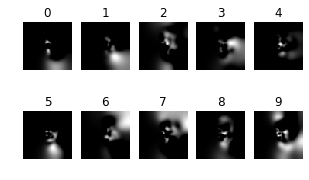%0A">

After training for 10 epochs, approx 5 minutes:

<img src="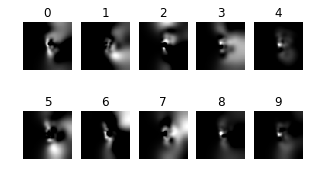%0A">

Lessons learnt:

- Not shown here, but loss actually minimised really well i.e. the MNIST decoder was able to decode the digit from these representations with high accuracy (> 90%!). So, while the encoder is learning well, it is learning in a way optimised for the MNIST decoder features. Some of the features may be useful, but mostly not really.
- As the images are decoded first, essentially each digit just maps to a single phosphene representation. Arguable whether a CNN is needed to achieve this (but still interesting...)
- Had a go messing with learning rates and oher hyperparameters here. May make a difference.

## June 5th: Decoder -> Generative Network against MNIST + Garbage

| Property | Value |
|-----------------|---|
| Git Commit Hash |e7f41258e408a15d1138b1a80bb97bace204363e |
| Grid | Polar Regular  |
| Vector size | 12 $\times$ 12 = 144 |

Because the output of the third attempt was learning features but ultimately still outputting garbageful renderers, I decided to add an additional class to the MNIST decoder - a "garbage" class full of random renders of 144-vectors. The architecture is otherwise very similar, just the decoding step at the end uses a decoder which can output 11 classes - and none of the "real" labels are of the 11th class, so hopefully the encoder should optimise *away* from garbage renders.

``` ditaa

                               +-------------------------------------------------------------+
                               |                                                             |
                               v                                                             |
          Digit Decoder ---> Encoder              Renderer     MNIST + Garbage Decoder       |
2D Image ---------------------------> 144-vector ----------> 2D Image ---------> Class --+   |
                                                                                          - Loss
Image Label -----------------------------------------------------------------------------+


```

Before training:

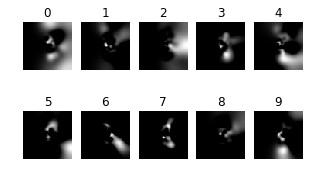

After training on 50 epochs (approx 40 minutes, though the training slows dramatically after the first 10 or so epochs):

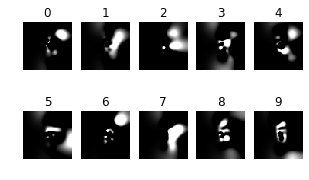

And losses:

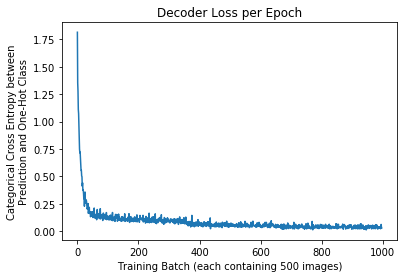

Lessons learnt:

- First time actually the output renders actually are somewhat encouraging (although they are far from human-interpretable, except for the 1!). Slightly more useful features are being learned, although clearly the network still optimises against the decoder nuances a little too much. But definitely better putting the "A" back in GAN!
- How to choose hyperparameters? Big question.
- For this particular run, I chose a learning rate of 1e-2. Larger learning rates cause more drastic changes on the first epoch. 

## June 11th: Upping the Decoder Layers and Learning Rate


| Property | Value |
|-----------------|---|
| Git Commit Hash |HEAD |
| Grid | Polar Regular  |
| Vector size | 12 $\times$ 12 = 144 |

I used the same architecture as above, but I wanted to see what would happen if I:

1. Upped the number of layers in the MNIST network (I added one more Conv1d layer)
2. Upping the learning rate (to 1e-1).

Training gif:

![GIF](../data/training-intermediate-data/training-gifs/2019-06-11_10-47_evolution_PolarRegularGrid_12-12_64-64.gif)

Plotted loss:

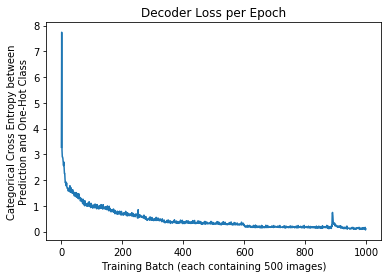

Lessons learnt:

1. The learning rate seems very aggressive (the loss shoots up initially, and indeed after the first few epochs, some of the digits are entirely blank). 
2. Seems to really "bleach" the digits.
3. Loss decreases but not to the level of a slower learning rate.
4. I get the impression that if I were to continue this beyond 50 epochs, I might get better results. 

# Plotting Utilities

In [28]:
def plot_loss(logpath):
    with open(logpath) as infile:
        loss_raw = infile.readlines()

    loss_data = np.array(list(map(float, loss_raw)))

    plt.plot(range(loss_data.shape[0]), loss_data)
    plt.ylabel("Categorical Cross Entropy between\nPrediction and One-Hot Class")
    plt.xlabel("Training Batch (each containing 500 images)")
    plt.title("Decoder Loss per Epoch")